## K√ºt√ºphaneleri Y√ºkleme

In [1]:
import warnings
import random
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

In [2]:
warnings.filterwarnings("ignore")

## Veriye ƒ∞lk Bakƒ±≈ü

In [3]:
df = pd.read_csv("C:/Users/musta/Desktop/addis_ababa/RTA Dataset.csv")
pd.set_option('display.max_columns', None)

df.head(100)

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0   17:02:00      Monday              18-30          Male   Above high school   
1   17:02:00      Monday              31-50          Male  Junior high school   
2   17:02:00      Monday              18-30          Male  Junior high school   
3    1:06:00      Sunday              18-30          Male  Junior high school   
4    1:06:00      Sunday              18-30          Male  Junior high school   
..       ...         ...                ...           ...                 ...   
95  17:35:00    Thursday              18-30          Male  Junior high school   
96  17:35:00    Thursday              18-30          Male  Junior high school   
97  17:35:00    Thursday              31-50          Male  Junior high school   
98  20:50:00      Sunday              18-30       Unknown  Junior high school   
99  20:50:00      Sunday            Over 51          Male  Junior high school   

   Vehicle_driver_relation Driving_experience       Type_of_vehicle  \
0                 Employee              1-2yr            Automobile   
1                 Employee         Above 10yr   Public (> 45 seats)   
2                 Employee              1-2yr       Lorry (41?100Q)   
3                 Employee             5-10yr   Public (> 45 seats)   
4                 Employee              2-5yr                   NaN   
..                     ...                ...                   ...   
95                Employee              2-5yr       Lorry (41?100Q)   
96                Employee              2-5yr  Public (13?45 seats)   
97                Employee              2-5yr            Long lorry   
98                Employee              2-5yr            Automobile   
99                Employee         Above 10yr            Automobile   

   Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0             Owner              Above 10yr         No defect   
1             Owner                 5-10yrs         No defect   
2             Owner                     NaN         No defect   
3      Governmental                     NaN         No defect   
4             Owner                 5-10yrs         No defect   
..              ...                     ...               ...   
95            Owner                  2-5yrs         No defect   
96            Owner                     NaN         No defect   
97            Owner                 5-10yrs         No defect   
98            Owner                  2-5yrs               NaN   
99            Owner                 5-10yrs               NaN   

   Area_accident_occured                                  Lanes_or_Medians  \
0      Residential areas                                               NaN   
1           Office areas                                 Undivided Two way   
2     Recreational areas                                             other   
3           Office areas                                             other   
4       Industrial areas                                             other   
..                   ...                                               ...   
95     Residential areas                       Double carriageway (median)   
96          Office areas  Two-way (divided with broken lines road marking)   
97          Office areas  Two-way (divided with broken lines road marking)   
98     Residential areas  Two-way (divided with broken lines road marking)   
99          Church areas                                             other   

                                  Road_allignment Types_of_Junction  \
0                  Tangent road with flat terrain       No junction   
1                  Tangent road with flat terrain       No junction   
2                                             NaN       No junction   
3   Tangent road with mild grade and flat terrain           Y Shape   
4                  Tangent road with flat terrain           Y Shape   
..                                    

In [4]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [5]:
df_turkce = df.rename(columns={
    'Time': 'Zaman',
    'Day_of_week': 'Haftanƒ±n_G√ºn√º',
    'Age_band_of_driver': 'S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ±',
    'Sex_of_driver': 'S√ºr√ºc√ºn√ºn_Cinsiyeti',
    'Educational_level': 'Eƒüitim_D√ºzeyi',
    'Vehicle_driver_relation': 'Ara√ß_S√ºr√ºc√º_ƒ∞li≈ükisi',
    'Driving_experience': 'S√ºr√º≈ü_Deneyimi',
    'Type_of_vehicle': 'Ara√ß_Tipi',
    'Owner_of_vehicle': 'Ara√ß_Sahibi',
    'Service_year_of_vehicle': 'Aracƒ±n_Hizmet_Yƒ±lƒ±',
    'Defect_of_vehicle': 'Ara√ß_Arƒ±zasƒ±',
    'Area_accident_occured': 'Kaza_Meydana_Geldiƒüi_Alan',
    'Lanes_or_Medians': '≈ûeritler_Veya_Ref√ºjler',
    'Road_allignment': 'Yol_≈ûekli',
    'Types_of_Junction': 'Kav≈üak_Tipi',
    'Road_surface_type': 'Yol_Y√ºzey_Tipi',
    'Road_surface_conditions': 'Yol_Y√ºzey_Durumu',
    'Light_conditions': 'I≈üƒ±k_Ko≈üullarƒ±',
    'Weather_conditions': 'Hava_Ko≈üullarƒ±',
    'Type_of_collision': '√áarpƒ±≈üma_Tipi',
    'Number_of_vehicles_involved': 'Kaza_Yapan_Ara√ß_Sayƒ±sƒ±',
    'Number_of_casualties': 'Yaralƒ±_Sayƒ±sƒ±',
    'Vehicle_movement': 'Ara√ß_Hareketi',
    'Casualty_class': 'Yaralanma_Sƒ±nƒ±fƒ±',
    'Sex_of_casualty': 'Yaralƒ±nƒ±n_Cinsiyeti',
    'Age_band_of_casualty': 'Yaralƒ±nƒ±n_Ya≈ü_Aralƒ±ƒüƒ±',
    'Casualty_severity': 'Yaralanma_Ciddiyeti',
    'Work_of_casuality': 'Yaralƒ±nƒ±n_Mesleƒüi',
    'Fitness_of_casuality': 'Yaralƒ±nƒ±n_Saƒülƒ±k_Durumu',
    'Pedestrian_movement': 'Yayalarƒ±n_Hareketi',
    'Cause_of_accident': 'Kazanƒ±n_Nedeni',
    'Accident_severity': 'Kaza_Ciddiyeti'
})
df_turkce

Zaman Haftanƒ±n_G√ºn√º S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ± S√ºr√ºc√ºn√ºn_Cinsiyeti  \
0      17:02:00        Monday                 18-30                Male   
1      17:02:00        Monday                 31-50                Male   
2      17:02:00        Monday                 18-30                Male   
3       1:06:00        Sunday                 18-30                Male   
4       1:06:00        Sunday                 18-30                Male   
...         ...           ...                   ...                 ...   
12311  16:15:00     Wednesday                 31-50                Male   
12312  18:00:00        Sunday               Unknown                Male   
12313  13:55:00        Sunday               Over 51                Male   
12314  13:55:00        Sunday                 18-30              Female   
12315  13:55:00        Sunday                 18-30                Male   

            Eƒüitim_D√ºzeyi Ara√ß_S√ºr√ºc√º_ƒ∞li≈ükisi S√ºr√º≈ü_Deneyimi  \
0       Above high school             Employee          1-2yr   
1      Junior high school             Employee     Above 10yr   
2      Junior high school             Employee          1-2yr   
3      Junior high school             Employee         5-10yr   
4      Junior high school             Employee          2-5yr   
...                   ...                  ...            ...   
12311                 NaN             Employee          2-5yr   
12312   Elementary school             Employee         5-10yr   
12313  Junior high school             Employee         5-10yr   
12314  Junior high school             Employee     Above 10yr   
12315  Junior high school             Employee         5-10yr   

                 Ara√ß_Tipi   Ara√ß_Sahibi Aracƒ±n_Hizmet_Yƒ±lƒ± Ara√ß_Arƒ±zasƒ±  \
0               Automobile         Owner         Above 10yr    No defect   
1      Public (> 45 seats)         Owner            5-10yrs    No defect   
2          Lorry (41?100Q)         Owner                NaN    No defect   
3      Public (> 45 seats)  Governmental                NaN    No defect   
4                      NaN         Owner            5-10yrs    No defect   
...                    ...           ...                ...          ...   
12311       Lorry (11?40Q)         Owner                NaN    No defect   
12312           Automobile         Owner                NaN    No defect   
12313                Bajaj         Owner             2-5yrs    No defect   
12314      Lorry (41?100Q)         Owner             2-5yrs    No defect   
12315                Other         Owner             2-5yrs    No defect   

      Kaza_Meydana_Geldiƒüi_Alan  \
0             Residential areas   
1                  Office areas   
2            Recreational areas   
3                  Office areas   
4              Industrial areas   
...                         ...   
12311       Outside rural areas   
12312       Outside rural areas   
12313       Outside rural areas   
12314              Office areas   
12315       Outside rural areas   

                                 ≈ûeritler_Veya_Ref√ºjler  \
0                                                   NaN   
1                                     Undivided Two way   
2                                                 other   
3                                                 other   
4                                                 other   
...                                                 ...   
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                           Yol_≈ûekli  Kav≈üak_Tipi  \
0                     Tangent road with flat terrain  No junction   
1                     Tangent road with flat terrain  No junction   
2                                      

In [6]:
for s√ºtun in df_turkce.columns:
    print(f"üîπ {s√ºtun} s√ºtununun ilk 15 e≈üsiz deƒüeri:")
    print(df_turkce[s√ºtun].unique()[:15])  # ilk 15 e≈üsiz deƒüeri yazdƒ±r
    print("-" * 40)

üîπ Zaman s√ºtununun ilk 15 e≈üsiz deƒüeri:
['17:02:00' '1:06:00' '14:15:00' '17:30:00' '17:20:00' '14:40:00'
 '17:45:00' '22:45:00' '8:20:00' '15:10:00' '12:11:00' '18:36:00'
 '14:35:00' '12:25:00' '15:30:00']
----------------------------------------
üîπ Haftanƒ±n_G√ºn√º s√ºtununun ilk 15 e≈üsiz deƒüeri:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
----------------------------------------
üîπ S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ± s√ºtununun ilk 15 e≈üsiz deƒüeri:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
----------------------------------------
üîπ S√ºr√ºc√ºn√ºn_Cinsiyeti s√ºtununun ilk 15 e≈üsiz deƒüeri:
['Male' 'Female' 'Unknown']
----------------------------------------
üîπ Eƒüitim_D√ºzeyi s√ºtununun ilk 15 e≈üsiz deƒüeri:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
----------------------------------------
üîπ Ara√ß_S√ºr√ºc√º_ƒ∞li≈ükisi s√ºtununun ilk 15 e≈üsiz deƒüeri:

In [7]:
df_turkce.describe().T

count      mean       std  min  25%  50%  75%  max
Kaza_Yapan_Ara√ß_Sayƒ±sƒ±  12316.0  2.040679  0.688790  1.0  2.0  2.0  2.0  7.0
Yaralƒ±_Sayƒ±sƒ±           12316.0  1.548149  1.007179  1.0  1.0  1.0  2.0  8.0

## Eksik Veri Analizi

In [8]:
df_turkce.replace(["unknown", "Unknown", "UNKNOWN", "na","nan", "Na", "NA", "NaN", ""], np.nan, inplace=True)
df_turkce = df_turkce.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [9]:
print(df_turkce.isnull().sum())  
print(df_turkce.isnull().mean() * 100)

Zaman                           0
Haftanƒ±n_G√ºn√º                   0
S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ±        1548
S√ºr√ºc√ºn√ºn_Cinsiyeti           178
Eƒüitim_D√ºzeyi                 841
Ara√ß_S√ºr√ºc√º_ƒ∞li≈ükisi          593
S√ºr√º≈ü_Deneyimi                862
Ara√ß_Tipi                     950
Ara√ß_Sahibi                   482
Aracƒ±n_Hizmet_Yƒ±lƒ±           6811
Ara√ß_Arƒ±zasƒ±                 4427
Kaza_Meydana_Geldiƒüi_Alan     261
≈ûeritler_Veya_Ref√ºjler        442
Yol_≈ûekli                     142
Kav≈üak_Tipi                  1078
Yol_Y√ºzey_Tipi                172
Yol_Y√ºzey_Durumu                0
I≈üƒ±k_Ko≈üullarƒ±                  0
Hava_Ko≈üullarƒ±                292
√áarpƒ±≈üma_Tipi                 169
Kaza_Yapan_Ara√ß_Sayƒ±sƒ±          0
Yaralƒ±_Sayƒ±sƒ±                   0
Ara√ß_Hareketi                 396
Yaralanma_Sƒ±nƒ±fƒ±             4443
Yaralƒ±nƒ±n_Cinsiyeti          4443
Yaralƒ±nƒ±n_Ya≈ü_Aralƒ±ƒüƒ±        4443
Yaralanma_Ciddiyeti          4443
Yaralƒ±nƒ±n_Me

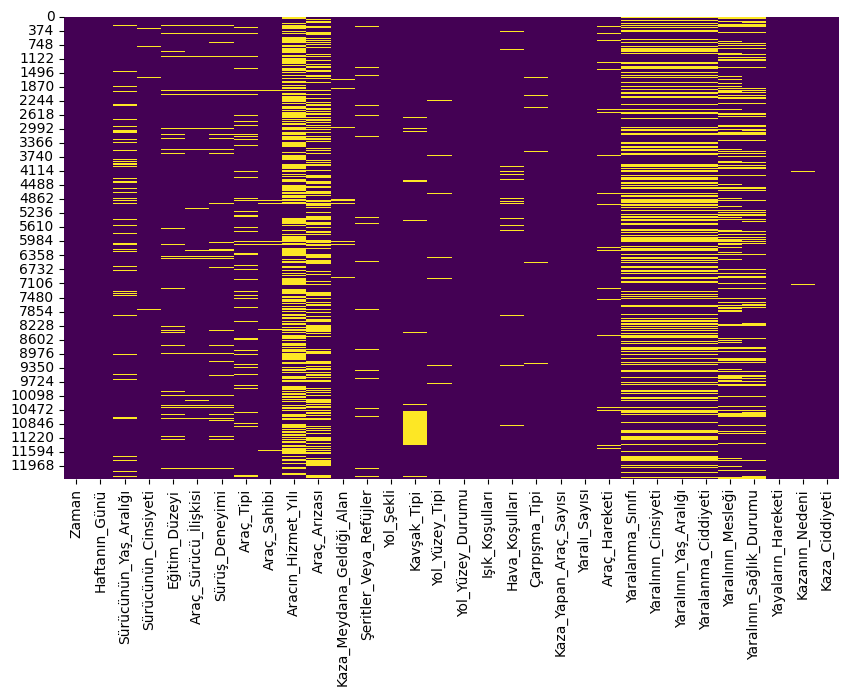

In [10]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df_turkce.isnull(), cbar=False, cmap='viridis') 
plt.show()

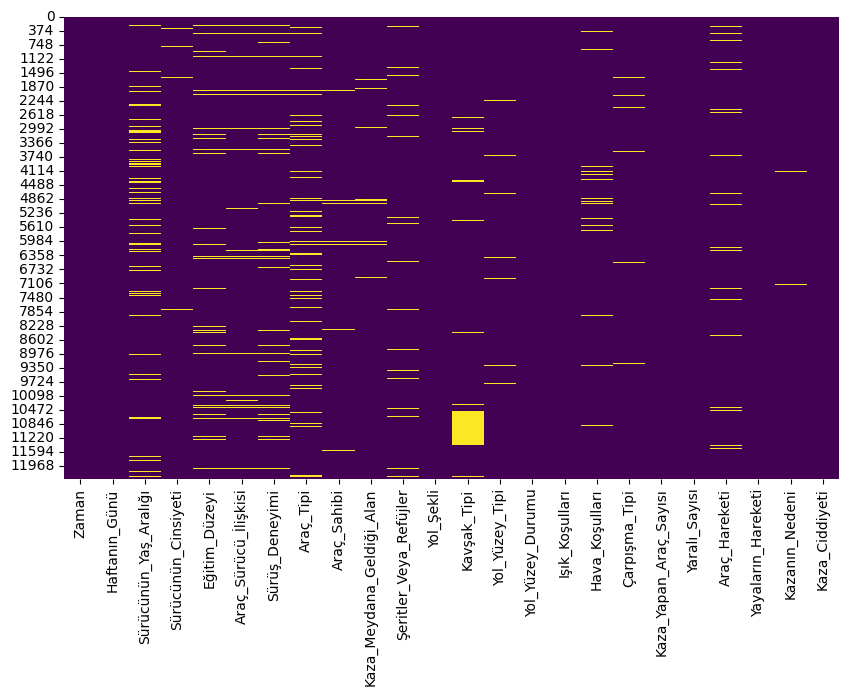

In [11]:
df_turkce.drop(['Aracƒ±n_Hizmet_Yƒ±lƒ±', 'Ara√ß_Arƒ±zasƒ±',"Yaralanma_Sƒ±nƒ±fƒ±","Yaralƒ±nƒ±n_Cinsiyeti",'Yaralƒ±nƒ±n_Ya≈ü_Aralƒ±ƒüƒ±','Yaralanma_Ciddiyeti','Yaralƒ±nƒ±n_Mesleƒüi','Yaralƒ±nƒ±n_Saƒülƒ±k_Durumu'], axis=1, inplace=True)
plt.figure(figsize=(10, 6)) 
sns.heatmap(df_turkce.isnull(), cbar=False, cmap='viridis') 
plt.show()

In [12]:
def saat_to_float(saat_str):
    if pd.isnull(saat_str):
        return np.nan
    saat, dakika, *_ = map(int, saat_str.split(':'))
    return saat + dakika / 60

def float_to_time_string(saat_float):
    saat = int(saat_float)
    dakika = int((saat_float - saat) * 60)
    return f"{saat:02d}:{dakika:02d}"

df_turkce['Saat_Numeric'] = df_turkce['Zaman'].apply(saat_to_float)

kmeans = KMeans(n_clusters=5, random_state=42)
saat_dizisi = df_turkce[['Saat_Numeric']].dropna().values
df_turkce.loc[df_turkce['Saat_Numeric'].notnull(), 'Saat_Kumesi'] = kmeans.fit_predict(saat_dizisi)

merkezler = kmeans.cluster_centers_.flatten()
merkez_sirali = np.argsort(merkezler)

yeni_kume_map = {orijinal_kume: yeni_kume for yeni_kume, orijinal_kume in enumerate(merkez_sirali)}
df_turkce['Saat_Kumesi'] = df_turkce['Saat_Kumesi'].map(yeni_kume_map)

kume_sinirlari = {}
for kume in sorted(df_turkce['Saat_Kumesi'].dropna().unique()):
    aralik = df_turkce[df_turkce['Saat_Kumesi'] == kume]['Saat_Numeric']
    min_saat = aralik.min()
    max_saat = aralik.max()
    kume_sinirlari[kume] = (float_to_time_string(min_saat), float_to_time_string(max_saat))

df_turkce['Zaman_Kategori'] = df_turkce['Saat_Kumesi'].map(lambda x: f"Kategori_{int(x)}" if pd.notnull(x) else np.nan)

In [13]:
print("üïí Zaman K√ºmeleri ve Aralƒ±klarƒ±:")
for kume, (start, end) in kume_sinirlari.items():
    print(f"Kategori_{kume}: {start} - {end}")


üïí Zaman K√ºmeleri ve Aralƒ±klarƒ±:
Kategori_0: 00:01 - 05:19
Kategori_1: 05:24 - 10:50
Kategori_2: 10:50 - 15:05
Kategori_3: 15:05 - 19:03
Kategori_4: 19:04 - 23:59


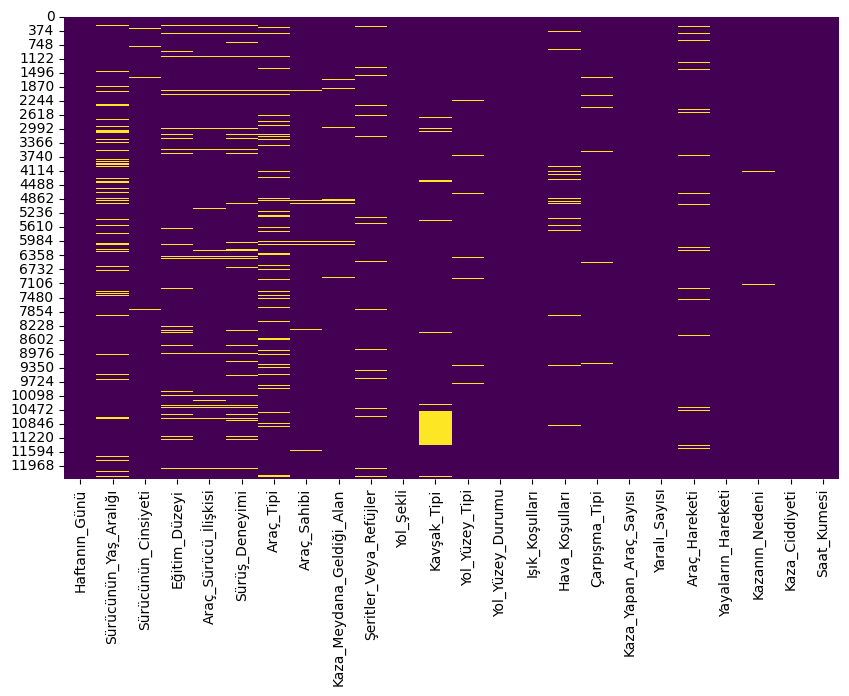

Haftanƒ±n_G√ºn√º S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ± S√ºr√ºc√ºn√ºn_Cinsiyeti  \
0            Monday                 18-30                Male   
1            Monday                 31-50                Male   
2            Monday                 18-30                Male   
3            Sunday                 18-30                Male   
4            Sunday                 18-30                Male   
...             ...                   ...                 ...   
12311     Wednesday                 31-50                Male   
12312        Sunday                   NaN                Male   
12313        Sunday               Over 51                Male   
12314        Sunday                 18-30              Female   
12315        Sunday                 18-30                Male   

            Eƒüitim_D√ºzeyi Ara√ß_S√ºr√ºc√º_ƒ∞li≈ükisi S√ºr√º≈ü_Deneyimi  \
0       Above high school             Employee          1-2yr   
1      Junior high school             Employee     Above 10yr   
2      Junior high school             Employee          1-2yr   
3      Junior high school             Employee         5-10yr   
4      Junior high school             Employee          2-5yr   
...                   ...                  ...            ...   
12311                 NaN             Employee          2-5yr   
12312   Elementary school             Employee         5-10yr   
12313  Junior high school             Employee         5-10yr   
12314  Junior high school             Employee     Above 10yr   
12315  Junior high school             Employee         5-10yr   

                 Ara√ß_Tipi   Ara√ß_Sahibi Kaza_Meydana_Geldiƒüi_Alan  \
0               Automobile         Owner         Residential areas   
1      Public (> 45 seats)         Owner              Office areas   
2          Lorry (41?100Q)         Owner        Recreational areas   
3      Public (> 45 seats)  Governmental              Office areas   
4                      NaN         Owner          Industrial areas   
...                    ...           ...                       ...   
12311       Lorry (11?40Q)         Owner       Outside rural areas   
12312           Automobile         Owner       Outside rural areas   
12313                Bajaj         Owner       Outside rural areas   
12314      Lorry (41?100Q)         Owner              Office areas   
12315                Other         Owner       Outside rural areas   

                                 ≈ûeritler_Veya_Ref√ºjler  \
0                                                   NaN   
1                                     Undivided Two way   
2                                                 other   
3                                                 other   
4                                                 other   
...                                                 ...   
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                           Yol_≈ûekli  Kav≈üak_Tipi  \
0                     Tangent road with flat terrain  No junction   
1                     Tangent road with flat terrain  No junction   
2                                                NaN  No junction   
3      Tangent road with mild grade and flat terrain      Y Shape   
4                     Tangent road with flat terrain      Y Shape   
...                                              ...          ...   
12311                 Tangent road with flat terrain  No junction   
12312                                    Escarpments  No junction   
12313      Tangent road with mountainous terrain and  No junction   
12314      Tangent road with mountainous terrain and  No junction   
12315      Tangent road with mountainous terrain and      O Shape   

      Yol_Y√ºzey_Tipi Yol_Y√ºzey

In [14]:
df_turkce.drop(['Zaman', 'Saat_Numeric',"Zaman_Kategori"], axis=1, inplace=True)
plt.figure(figsize=(10, 6)) 
sns.heatmap(df_turkce.isnull(), cbar=False, cmap='viridis') 
plt.show()

df_turkce

#### Kalan Eksik Verileri Giderme

In [2]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

df2 = df_turkce.copy()

kategorik_sutunlar = df2.select_dtypes(include=['object']).columns.tolist()

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df2_encoded = df2[kategorik_sutunlar].copy()
df2_encoded[:] = encoder.fit_transform(df2_encoded)

imputer = KNNImputer(n_neighbors=3)
df2_imputed = imputer.fit_transform(df2_encoded)

df2_filled = pd.DataFrame(encoder.inverse_transform(df2_imputed), columns=kategorik_sutunlar)

sayisal_sutunlar = df2.select_dtypes(exclude=['object']).columns
df2_final = pd.concat([df2_filled, df2[sayisal_sutunlar].reset_index(drop=True)], axis=1)

NameError: name 'df_turkce' is not defined

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df2_final.isnull(), cbar=False, cmap='viridis') 
plt.show()

## Aykƒ±rƒ± Veri Analizi

In [21]:
sayisal_sutunlar = ["Yaralƒ±_Sayƒ±sƒ±","Kaza_Yapan_Ara√ß_Sayƒ±sƒ±"]
for sutun in sayisal_sutunlar:
    print(f"üî∏ {sutun} s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:")
    print(df2_final[sutun].value_counts(dropna=False))
    print("-" * 50)

üî∏ Yaralƒ±_Sayƒ±sƒ± s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:
Yaralƒ±_Sayƒ±sƒ±
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64
--------------------------------------------------
üî∏ Kaza_Yapan_Ara√ß_Sayƒ±sƒ± s√ºtunundaki e≈üsiz deƒüerler ve frekanslarƒ±:
Kaza_Yapan_Ara√ß_Sayƒ±sƒ±
2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: count, dtype: int64
--------------------------------------------------


#### D√ºzenleme

In [22]:
df2_final["Kaza_Yapan_Ara√ß_Sayƒ±sƒ±"] = df2_final["Kaza_Yapan_Ara√ß_Sayƒ±sƒ±"].apply(
    lambda x: "2 ve Altƒ±" if x <= 2 else "3 ve √úst√º"
)

df2_final["Yaralƒ±_Sayƒ±sƒ±"] = df2_final["Yaralƒ±_Sayƒ±sƒ±"].apply(
    lambda x: "2 ve Altƒ±" if x <= 2 else "3 ve √úst√º"
)

## Veri G√∂rselle≈ütirme

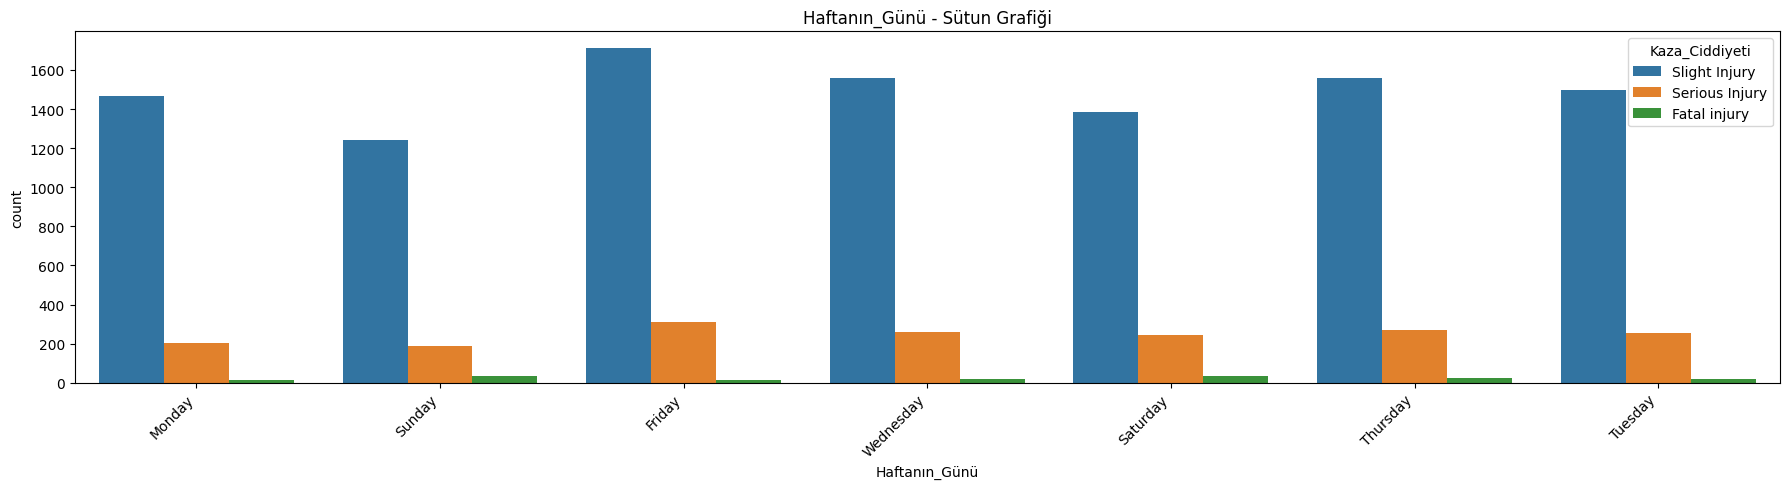

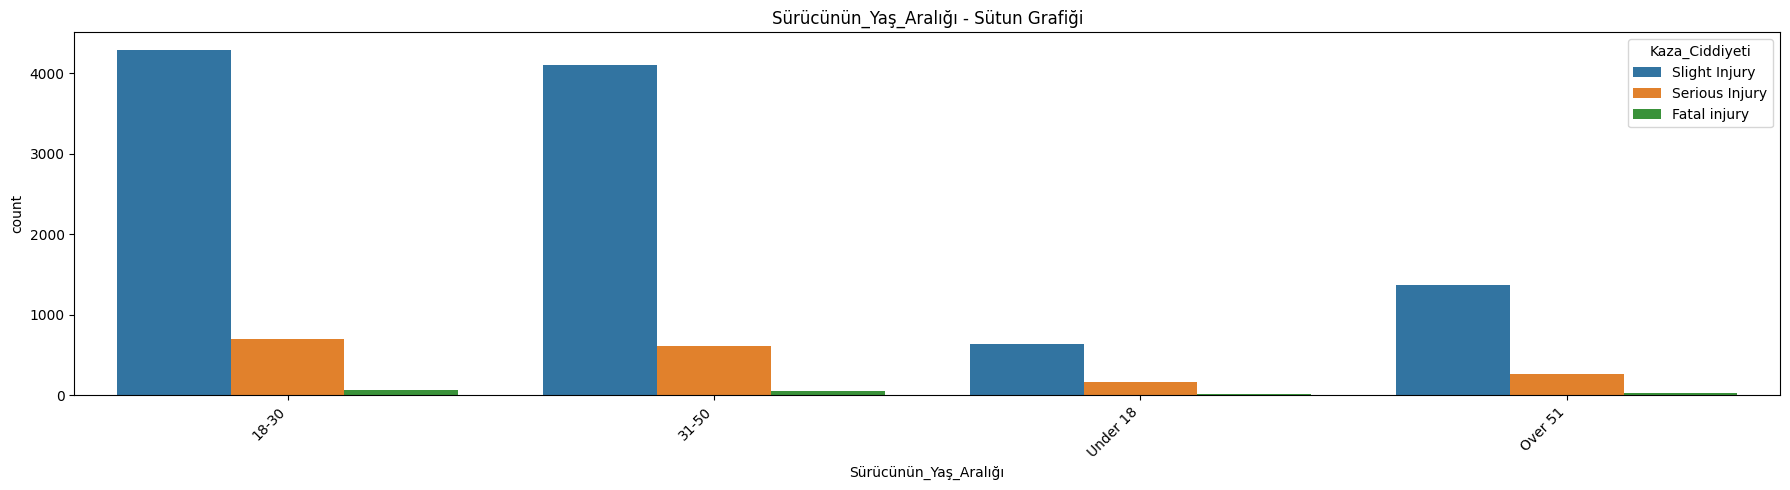

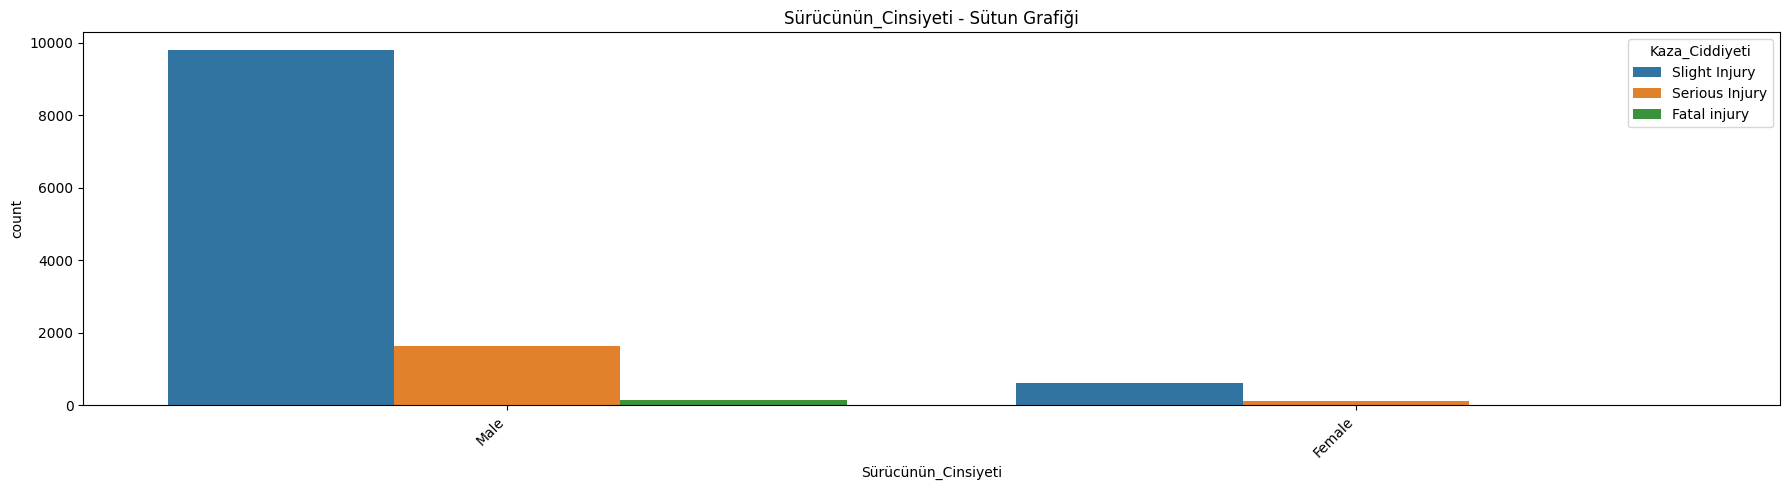

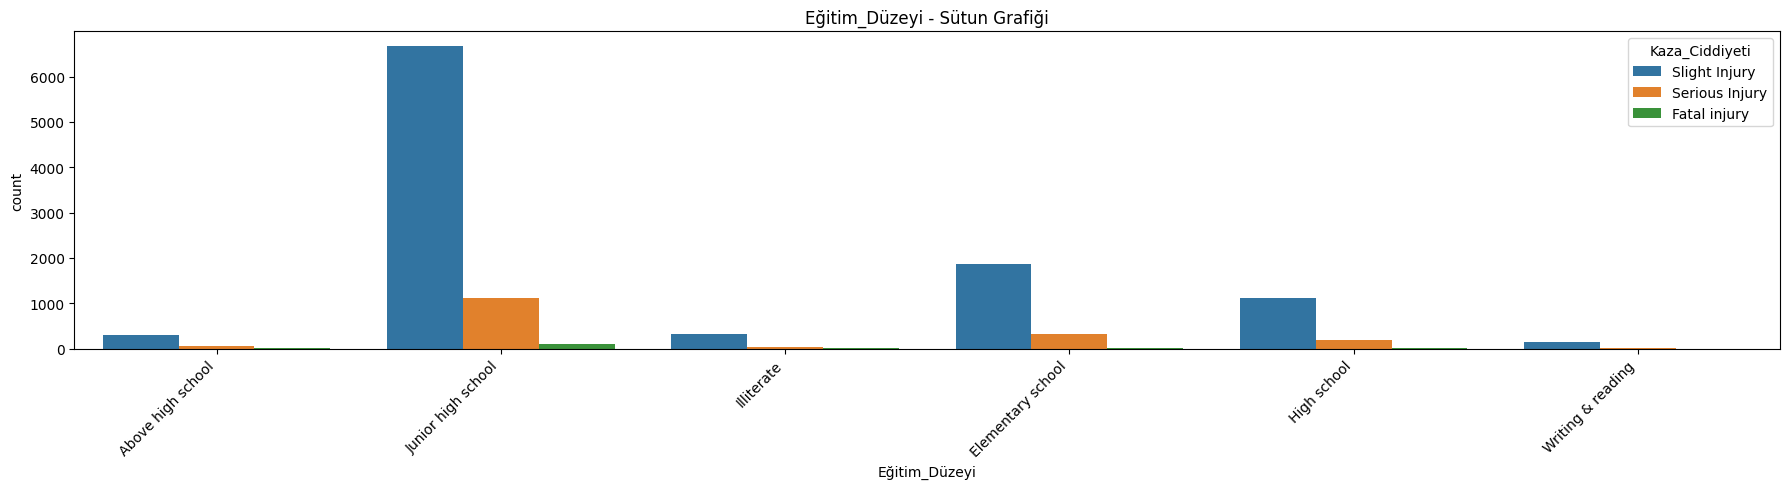

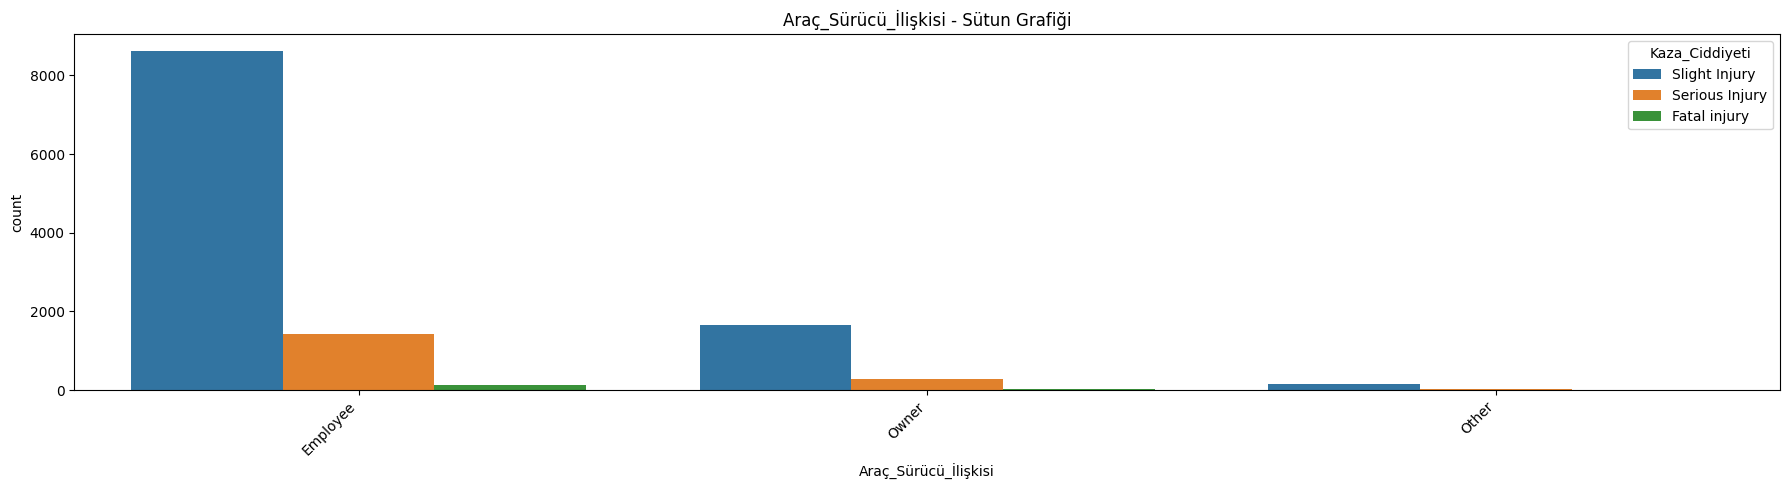

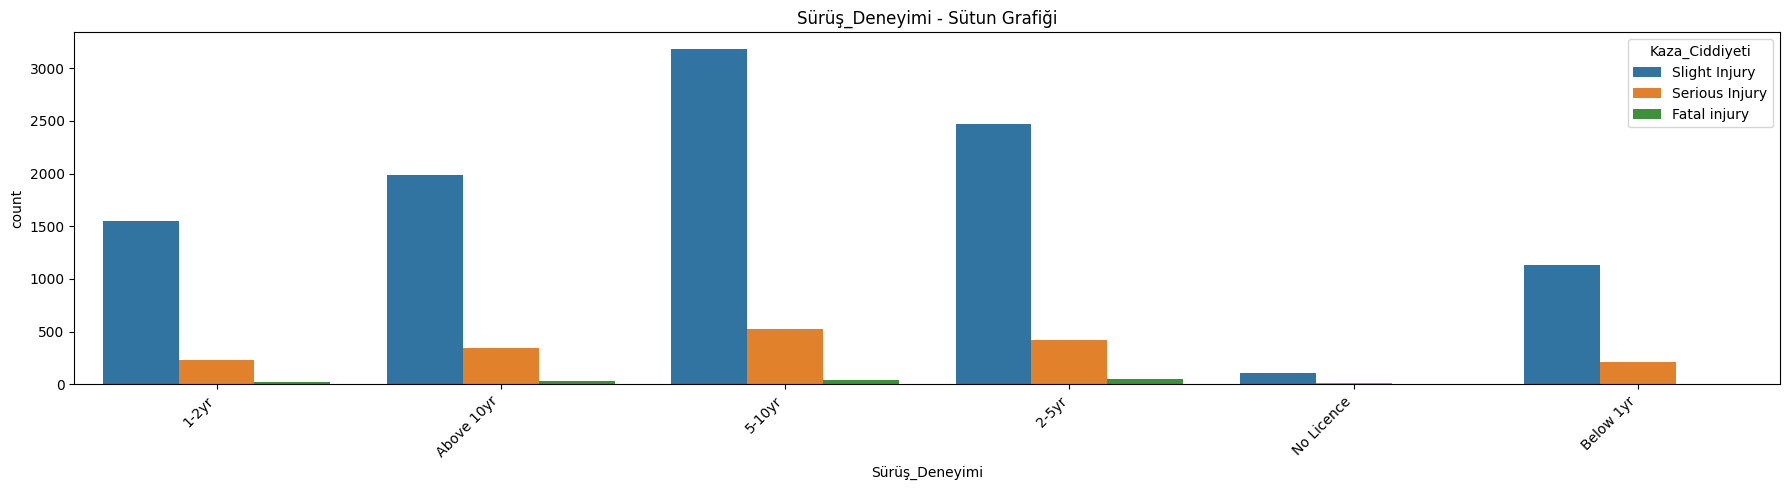

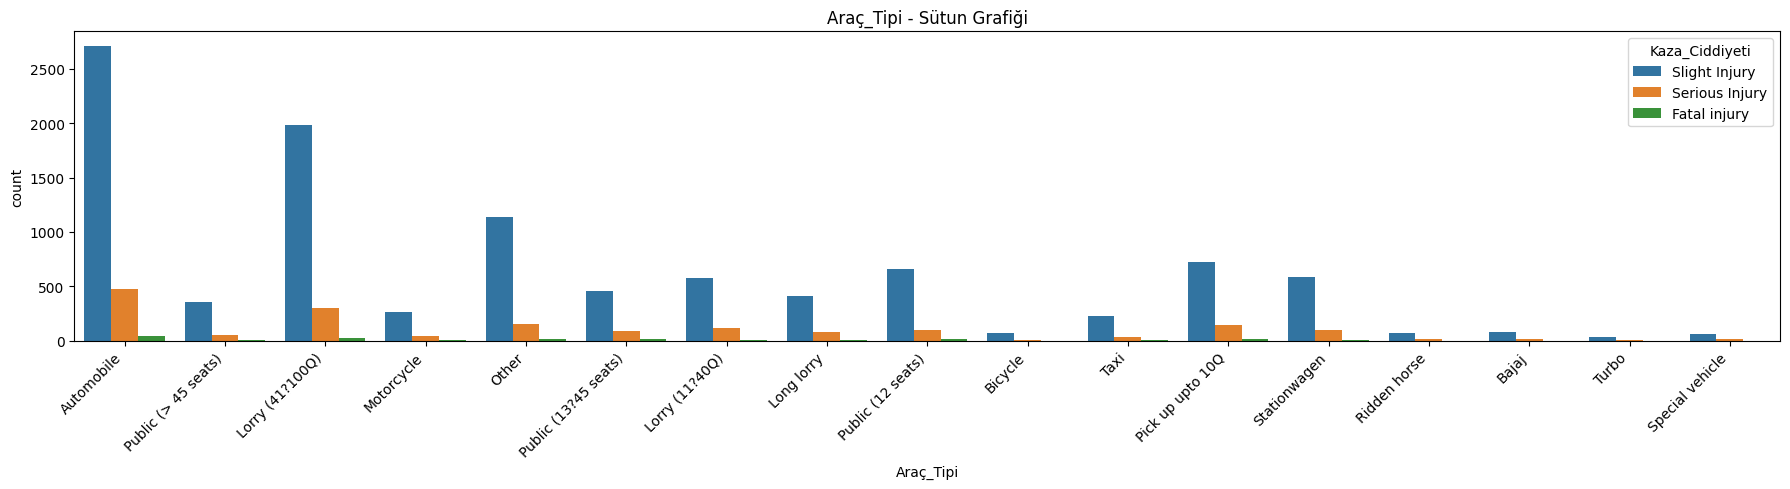

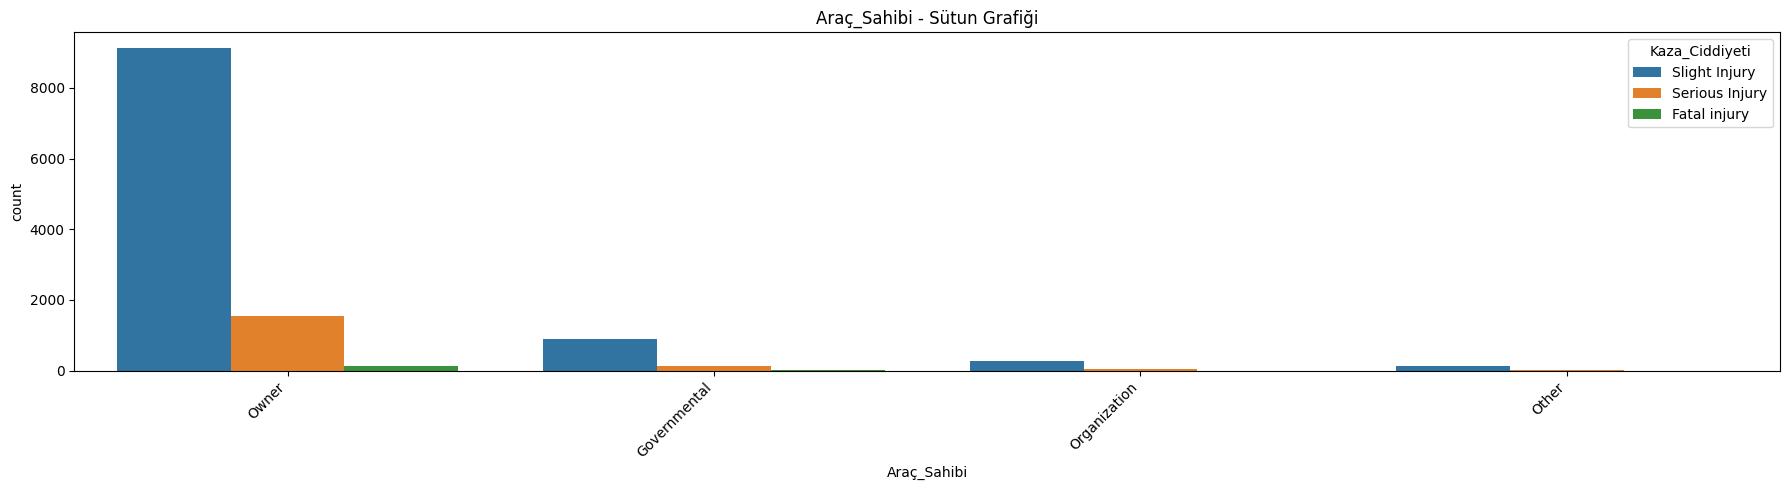

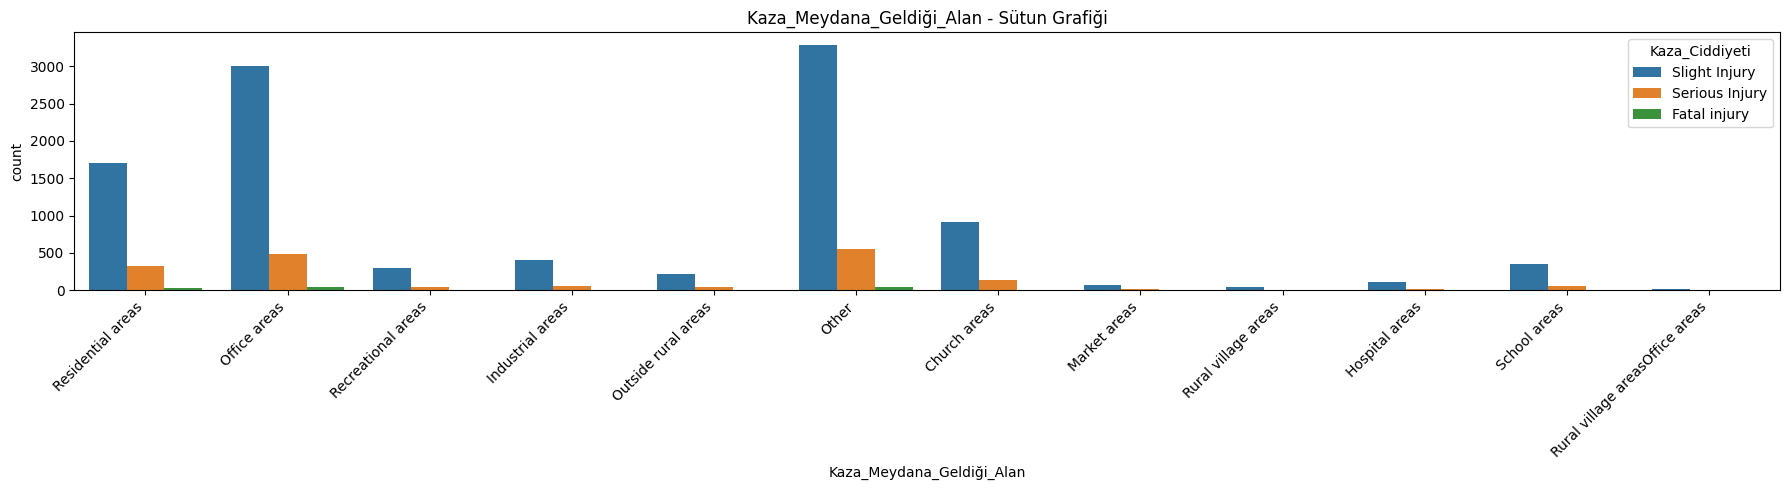

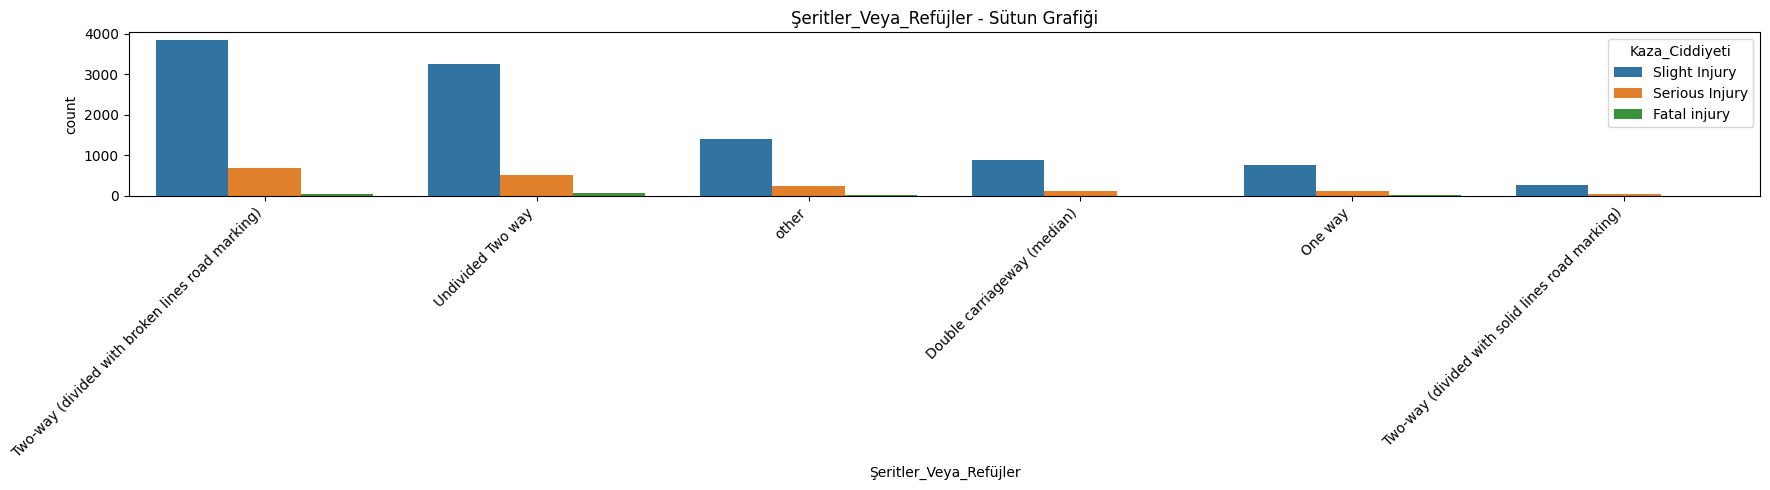

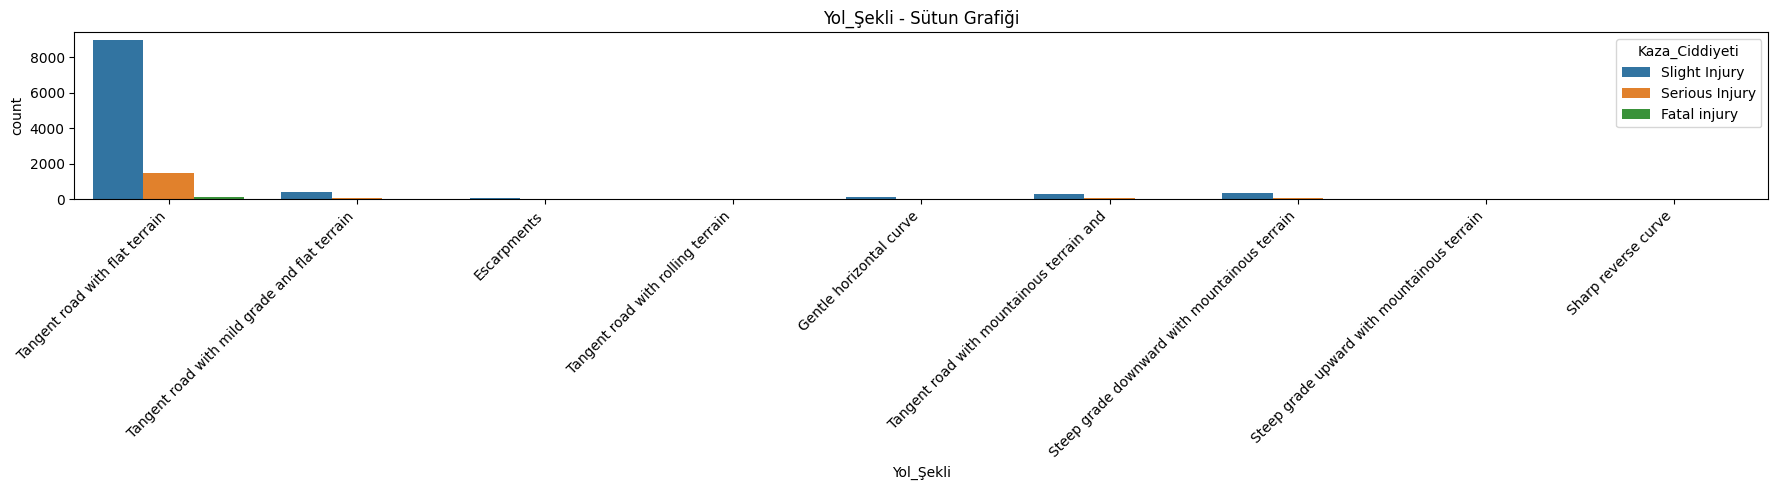

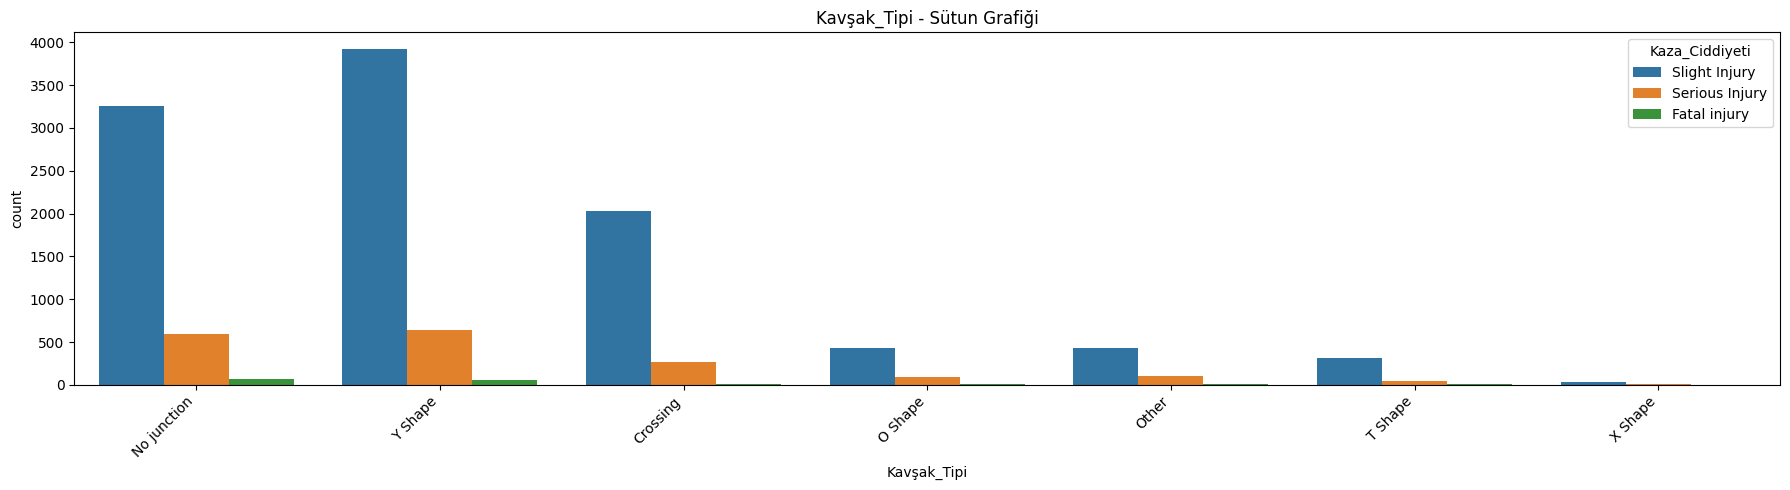

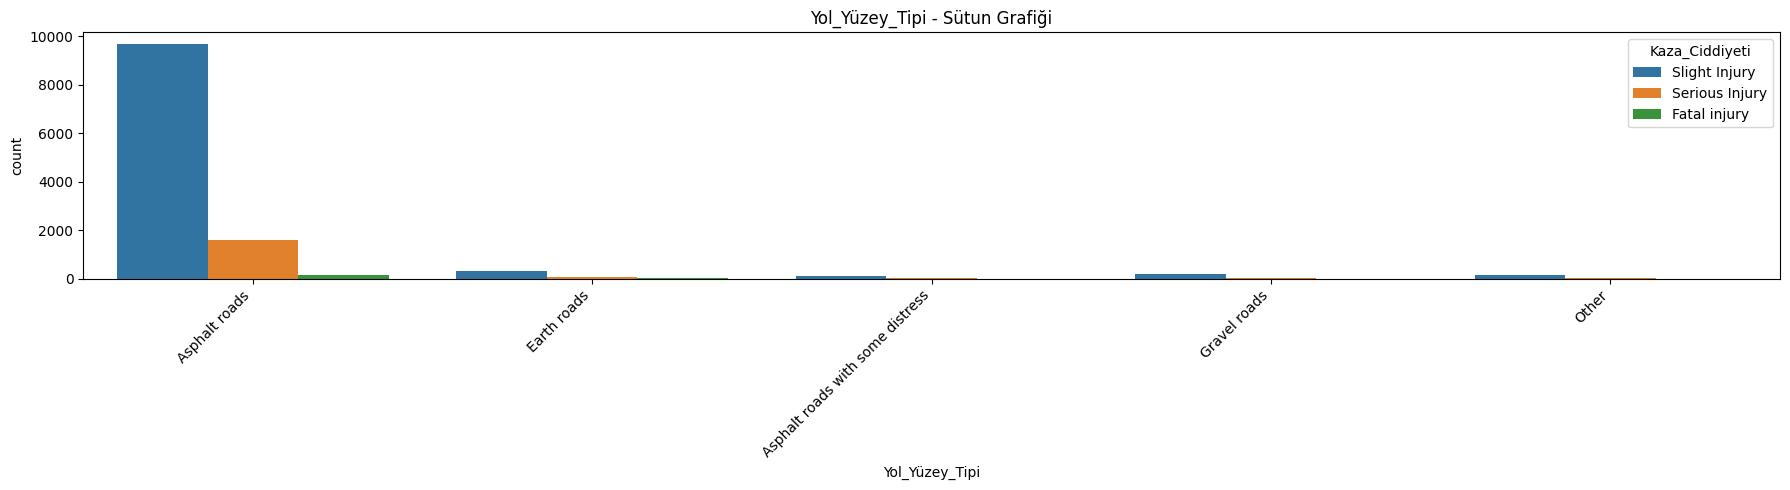

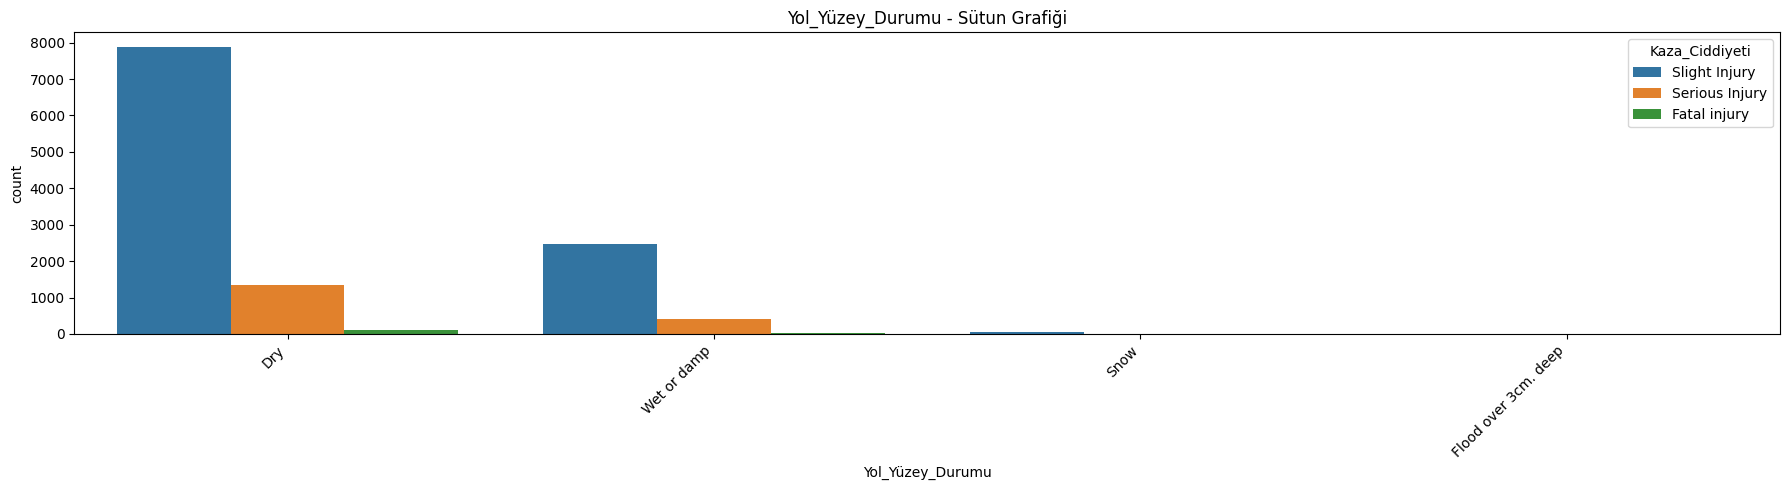

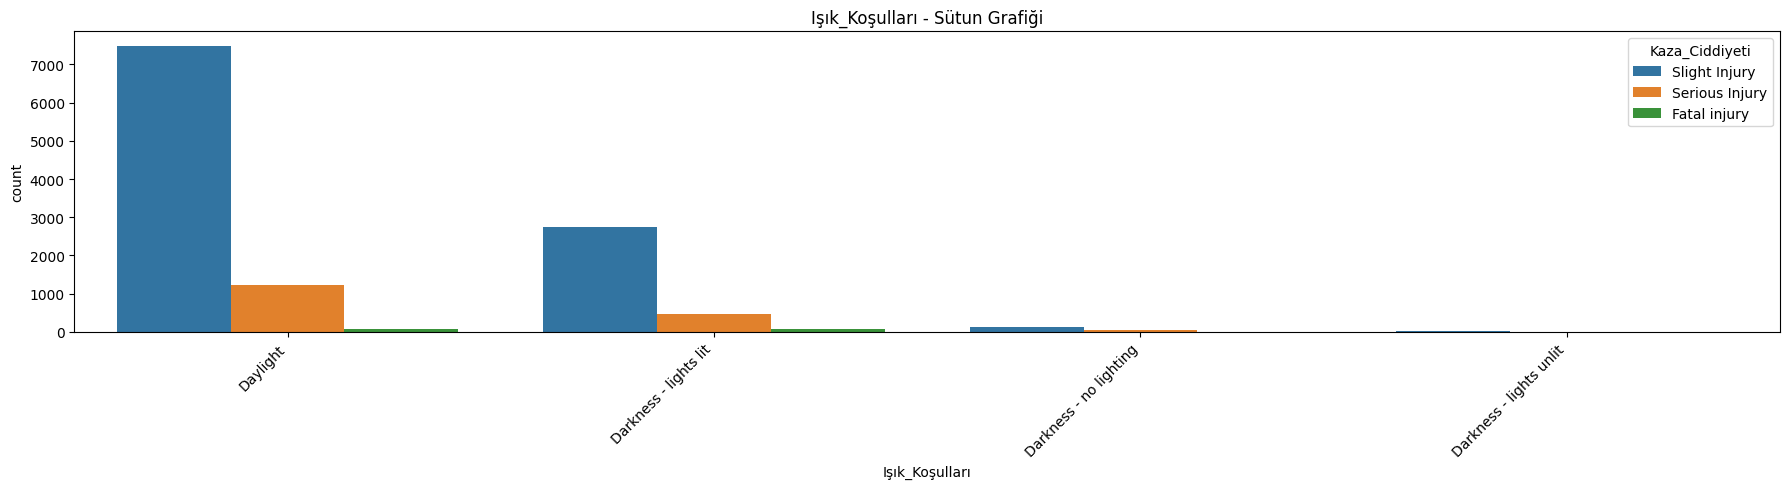

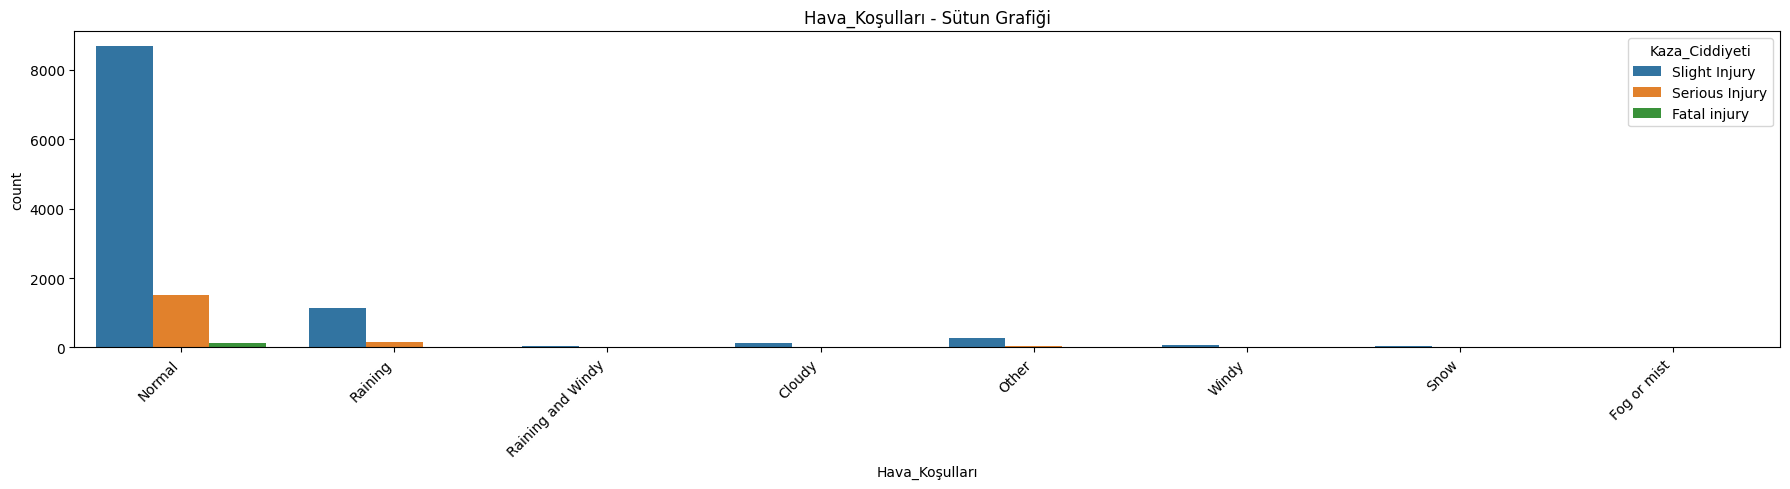

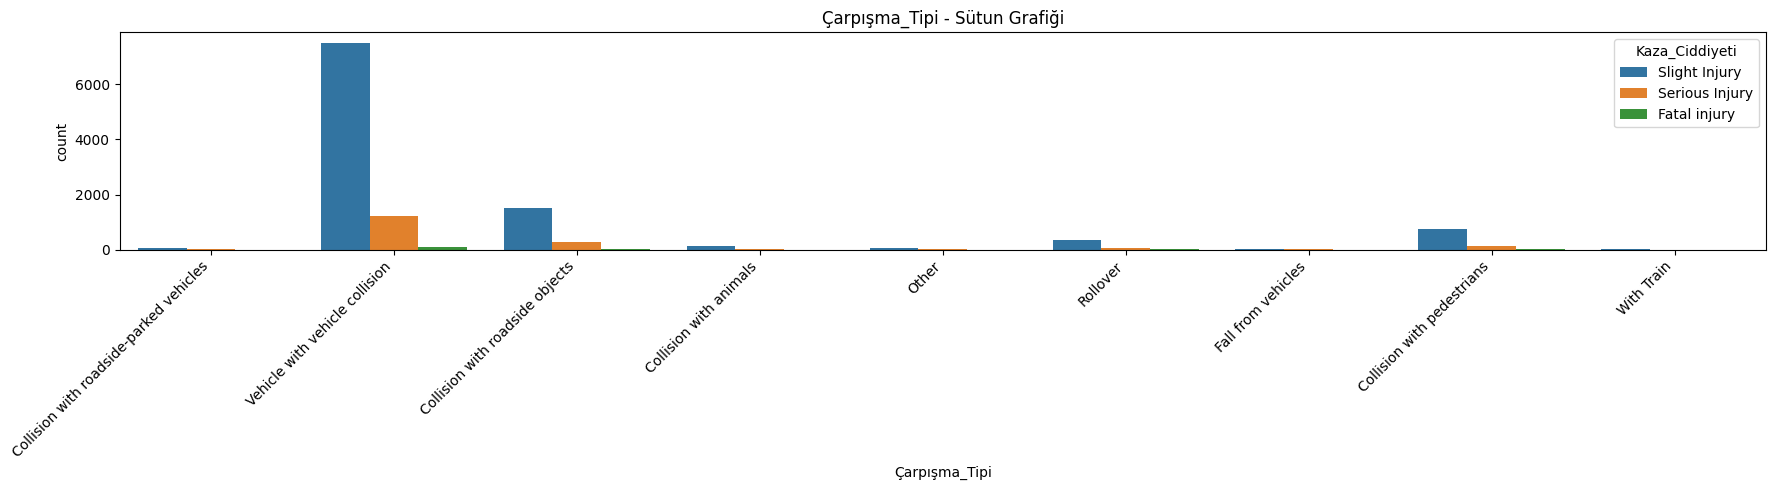

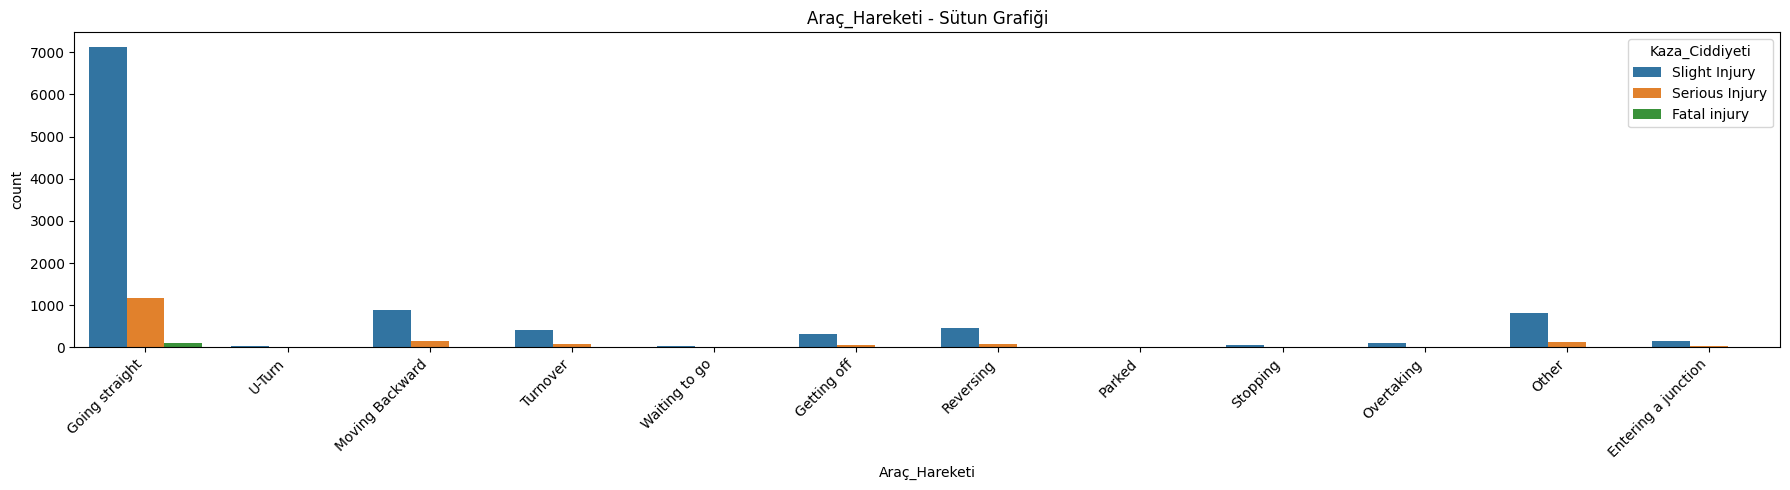

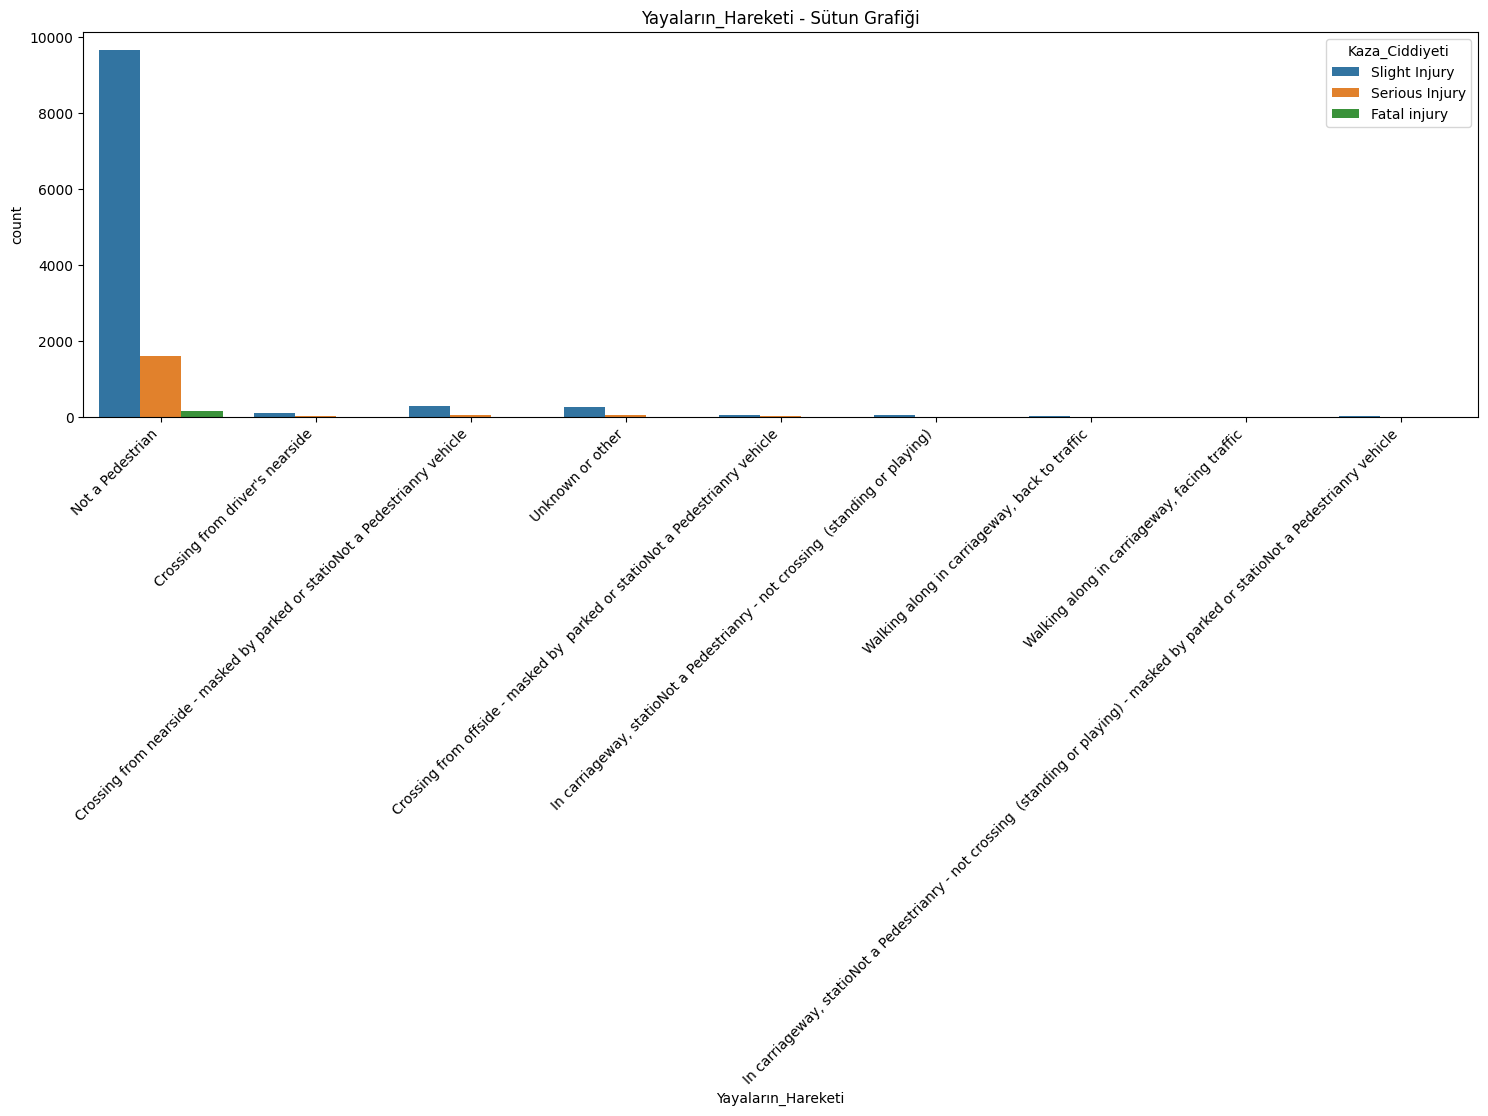

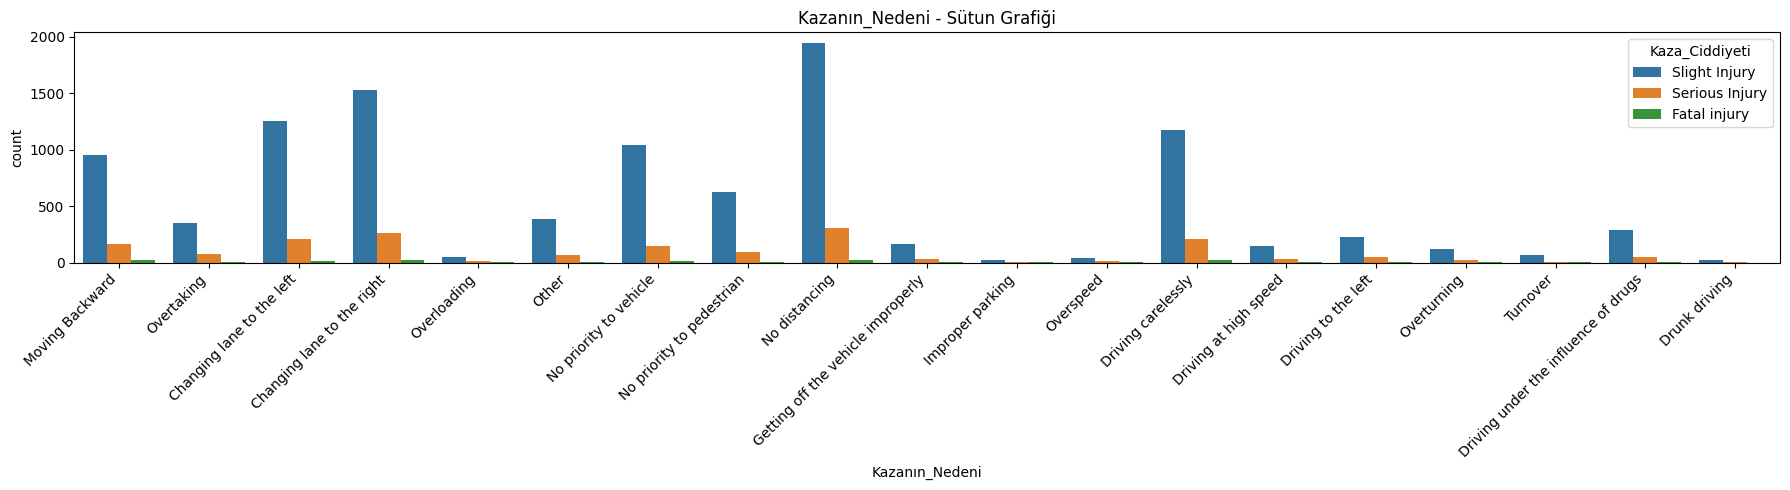

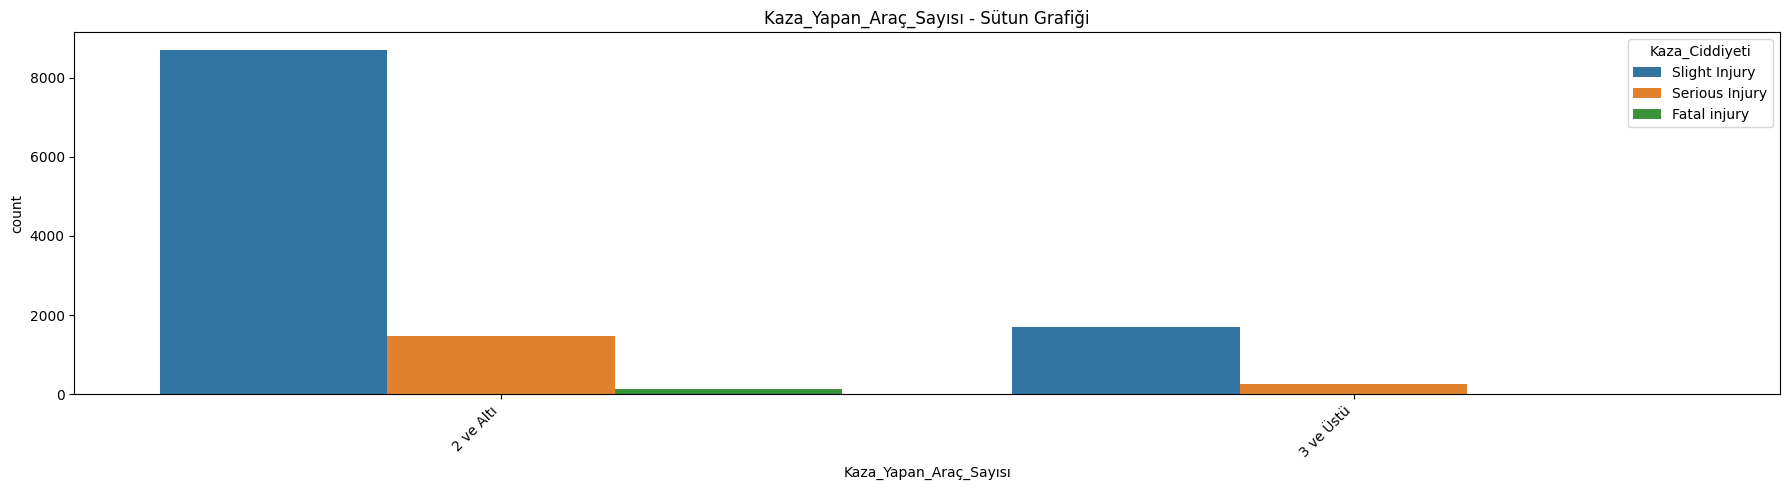

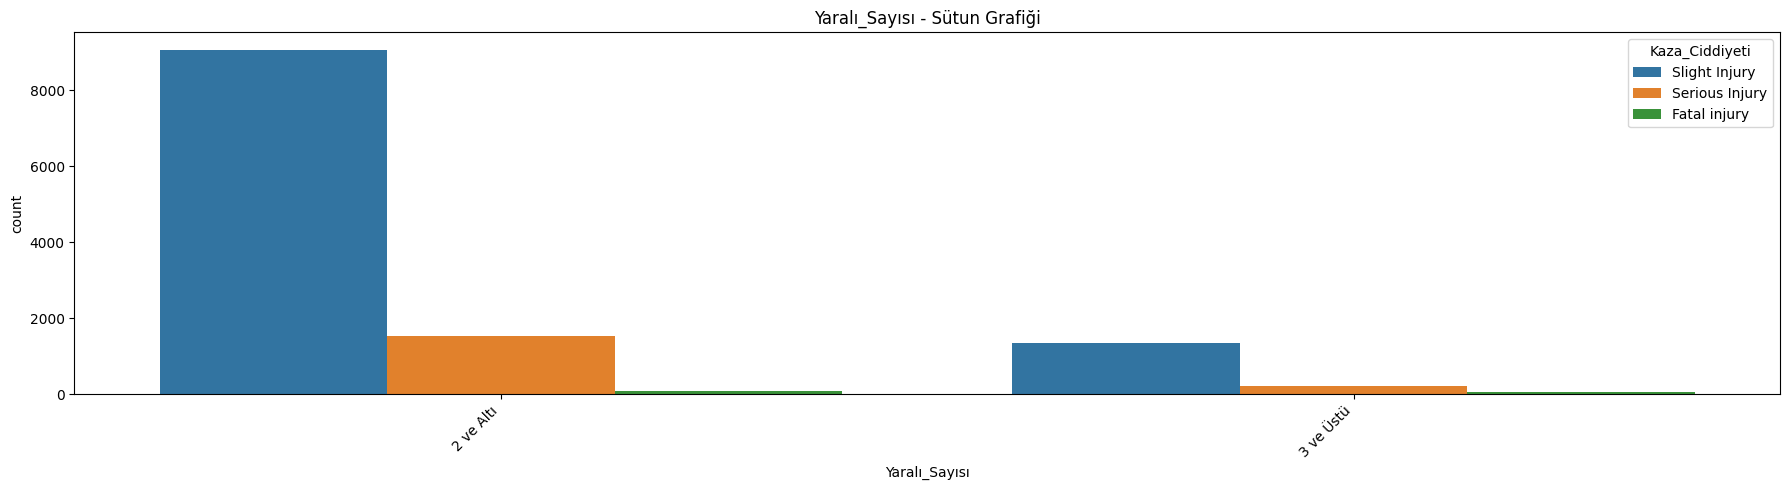

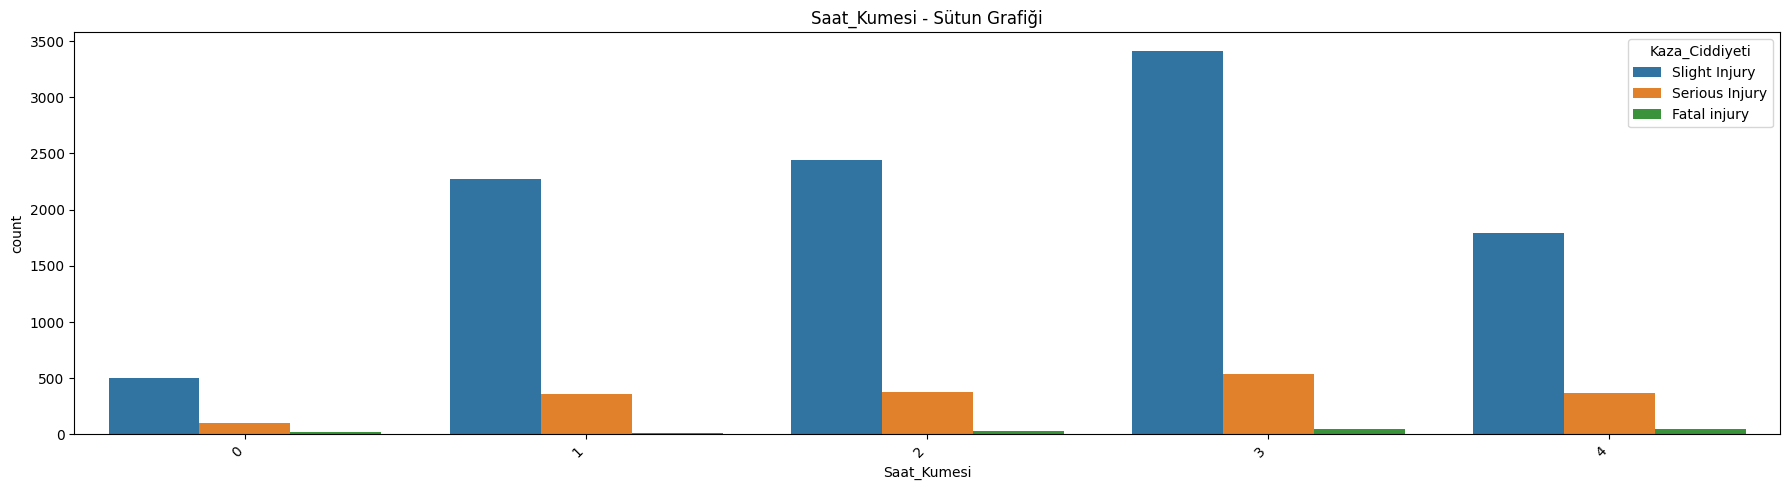

In [23]:
kategorik_sutunlar = [
    "Haftanƒ±n_G√ºn√º", "S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ±", "S√ºr√ºc√ºn√ºn_Cinsiyeti", "Eƒüitim_D√ºzeyi",
    "Ara√ß_S√ºr√ºc√º_ƒ∞li≈ükisi", "S√ºr√º≈ü_Deneyimi", "Ara√ß_Tipi", "Ara√ß_Sahibi",
    "Kaza_Meydana_Geldiƒüi_Alan", "≈ûeritler_Veya_Ref√ºjler", "Yol_≈ûekli", "Kav≈üak_Tipi",
    "Yol_Y√ºzey_Tipi", "Yol_Y√ºzey_Durumu", "I≈üƒ±k_Ko≈üullarƒ±", "Hava_Ko≈üullarƒ±",
    "√áarpƒ±≈üma_Tipi", "Ara√ß_Hareketi", "Yayalarƒ±n_Hareketi", "Kazanƒ±n_Nedeni",
    "Kaza_Yapan_Ara√ß_Sayƒ±sƒ±", "Yaralƒ±_Sayƒ±sƒ±", "Saat_Kumesi"
]

hedef = "Kaza_Ciddiyeti"

# Grafikler
for sutun in kategorik_sutunlar:
    plt.figure(figsize=(18, 5))

    # Countplot (s√ºtun grafiƒüi)
    plt.subplot(1, 1, 1)
    sns.countplot(data=df2_final, x=sutun, hue=hedef)
    plt.title(f'{sutun} - S√ºtun Grafiƒüi')
    plt.xticks(rotation=45, ha='right')


    plt.tight_layout()
    plt.show()

kaza_ciddiyeti_dict = {
    'Fatal injury': 'Aƒüƒ±r',
    'Serious Injury': 'Orta',
    'Slight Injury': 'Hafif'
}

## Etiketlerin Girdilere G√∂re Y√ºzdelik Daƒüƒ±lƒ±mlarƒ±

In [24]:
sonuclar = {}

for sutun in kategorik_sutunlar:
    yuzde_daƒüƒ±lƒ±m = df2_final.groupby([sutun, 'Kaza_Ciddiyeti']).size().unstack().fillna(0)
    
    yuzde_daƒüƒ±lƒ±m = yuzde_daƒüƒ±lƒ±m.apply(lambda x: 100 * x / x.sum(), axis=1)
    
    yuzde_daƒüƒ±lƒ±m = yuzde_daƒüƒ±lƒ±m.rename(index=kaza_ciddiyeti_dict)
    
    sonuclar[sutun] = yuzde_daƒüƒ±lƒ±m
for sutun, sonuc in sonuclar.items():
    print(f"--- {sutun} ---")
    print(sonuc)
    print("\n")

--- Haftanƒ±n_G√ºn√º ---
Kaza_Ciddiyeti  Fatal injury  Serious Injury  Slight Injury
Haftanƒ±n_G√ºn√º                                              
Friday              0.783929       15.335620      83.880451
Monday              0.713861       12.135634      87.150506
Saturday            2.220888       14.705882      83.073229
Sunday              2.385821       12.951602      84.662577
Thursday            1.188547       14.694760      84.116694
Tuesday             0.960452       14.519774      84.519774
Wednesday           1.032609       14.239130      84.728261


--- S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ± ---
Kaza_Ciddiyeti         Fatal injury  Serious Injury  Slight Injury
S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ±                                             
18-30                      1.264322       13.887791      84.847886
31-50                      1.215169       12.717369      86.067463
Over 51                    1.449275       15.942029      82.608696
Under 18                   1.454545       20.4848

In [25]:
df2_final

Haftanƒ±n_G√ºn√º S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ± S√ºr√ºc√ºn√ºn_Cinsiyeti  \
0            Monday                 18-30                Male   
1            Monday                 31-50                Male   
2            Monday                 18-30                Male   
3            Sunday                 18-30                Male   
4            Sunday                 18-30                Male   
...             ...                   ...                 ...   
12311     Wednesday                 31-50                Male   
12312        Sunday                 31-50                Male   
12313        Sunday               Over 51                Male   
12314        Sunday                 18-30              Female   
12315        Sunday                 18-30                Male   

            Eƒüitim_D√ºzeyi Ara√ß_S√ºr√ºc√º_ƒ∞li≈ükisi S√ºr√º≈ü_Deneyimi  \
0       Above high school             Employee          1-2yr   
1      Junior high school             Employee     Above 10yr   
2      Junior high school             Employee          1-2yr   
3      Junior high school             Employee         5-10yr   
4      Junior high school             Employee          2-5yr   
...                   ...                  ...            ...   
12311  Junior high school             Employee          2-5yr   
12312   Elementary school             Employee         5-10yr   
12313  Junior high school             Employee         5-10yr   
12314  Junior high school             Employee     Above 10yr   
12315  Junior high school             Employee         5-10yr   

                 Ara√ß_Tipi   Ara√ß_Sahibi Kaza_Meydana_Geldiƒüi_Alan  \
0               Automobile         Owner         Residential areas   
1      Public (> 45 seats)         Owner              Office areas   
2          Lorry (41?100Q)         Owner        Recreational areas   
3      Public (> 45 seats)  Governmental              Office areas   
4               Motorcycle         Owner          Industrial areas   
...                    ...           ...                       ...   
12311       Lorry (11?40Q)         Owner       Outside rural areas   
12312           Automobile         Owner       Outside rural areas   
12313                Bajaj         Owner       Outside rural areas   
12314      Lorry (41?100Q)         Owner              Office areas   
12315                Other         Owner       Outside rural areas   

                                 ≈ûeritler_Veya_Ref√ºjler  \
0      Two-way (divided with broken lines road marking)   
1                                     Undivided Two way   
2                                                 other   
3                                                 other   
4                                                 other   
...                                                 ...   
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                           Yol_≈ûekli  Kav≈üak_Tipi  \
0                     Tangent road with flat terrain  No junction   
1                     Tangent road with flat terrain  No junction   
2                     Tangent road with flat terrain  No junction   
3      Tangent road with mild grade and flat terrain      Y Shape   
4                     Tangent road with flat terrain      Y Shape   
...                                              ...          ...   
12311                 Tangent road with flat terrain  No junction   
12312                                    Escarpments  No junction   
12313      Tangent road with mountainous terrain and  No junction   
12314      Tangent road with mountainous terrain and  No junction   
12315      Tangent road with mountainous terrain and      O Shape   

      Yol_Y√ºzey_Tipi Yol_Y√ºzey

## Korelasyon Matrisi

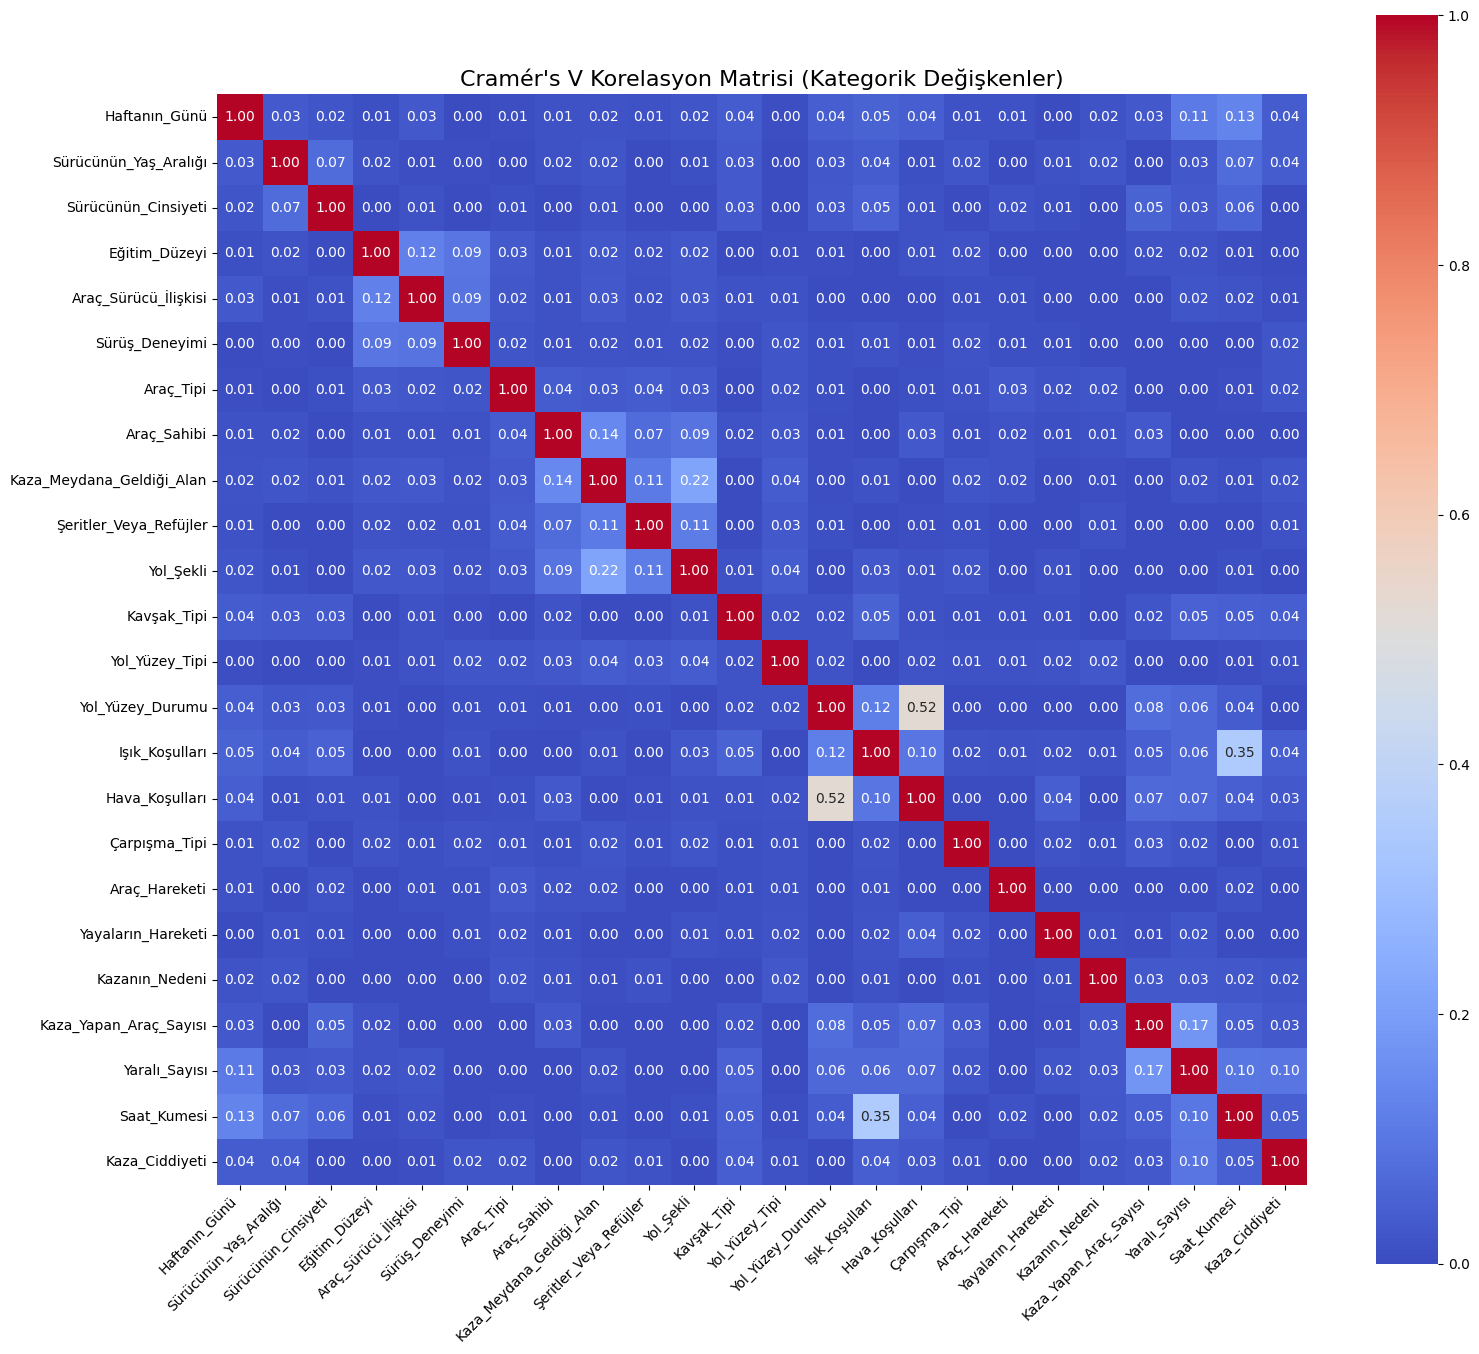

In [26]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    r_corr = r - ((r - 1)**2) / (n - 1)
    k_corr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))

x_sutunlari = [col for col in df2_final.columns if col != 'Kaza_Ciddiyeti']
tum_sutunlar = x_sutunlari + ['Kaza_Ciddiyeti']


korelasyon_matrisi = pd.DataFrame(index=tum_sutunlar, columns=tum_sutunlar)

for col1 in tum_sutunlar:
    for col2 in tum_sutunlar:
        try:
            korelasyon_matrisi.loc[col1, col2] = cramers_v(df2_final[col1], df2_final[col2])
        except:
            korelasyon_matrisi.loc[col1, col2] = np.nan

korelasyon_matrisi = korelasyon_matrisi.astype(float)

plt.figure(figsize=(16, 14))
sns.heatmap(korelasyon_matrisi, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Cram√©r's V Korelasyon Matrisi (Kategorik Deƒüi≈ükenler)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## √ñzellik Se√ßimi

In [27]:
X = df2_final.drop("Kaza_Ciddiyeti", axis=1)
y = df2_final["Kaza_Ciddiyeti"]

In [28]:
En_Cok2 = [
    "Yaralƒ±_Sayƒ±sƒ±",
    "Saat_Kumesi"
]
En_Cok6 = [
    "Yaralƒ±_Sayƒ±sƒ±",
    "Saat_Kumesi",
    "I≈üƒ±k_Ko≈üullarƒ±",
    "Kav≈üak_Tipi",
    "Haftanƒ±n_G√ºn√º",
    "S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ±"
]
En_Cok8 = [
    "Yaralƒ±_Sayƒ±sƒ±",
    "Saat_Kumesi",
    "I≈üƒ±k_Ko≈üullarƒ±",
    "Kav≈üak_Tipi",
    "Haftanƒ±n_G√ºn√º",
    "S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ±",
    "Kaza_Yapan_Ara√ß_Sayƒ±sƒ±",
    "Hava_Ko≈üullarƒ±"
]
En_Cok12 = [
    "Yaralƒ±_Sayƒ±sƒ±",
    "Saat_Kumesi",
    "I≈üƒ±k_Ko≈üullarƒ±",
    "Kav≈üak_Tipi",
    "Haftanƒ±n_G√ºn√º",
    "S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ±",
    "Kaza_Yapan_Ara√ß_Sayƒ±sƒ±",
    "Hava_Ko≈üullarƒ±",
    "S√ºr√º≈ü_Deneyimi",
    "Ara√ß_Tipi",
    "Kaza_Meydana_Geldiƒüi_Alan",
    "Kazanƒ±n_Nedeni"    
]

X_matrise_gore_2 = df2_final[En_Cok2].copy()
X_matrise_gore_6 = df2_final[En_Cok6].copy()
X_matrise_gore_8 = df2_final[En_Cok8].copy()
X_matrise_gore_12 = df2_final[En_Cok12].copy()

In [29]:
label_encoder = LabelEncoder()
for s√ºtun in X.columns:
    if X[s√ºtun].dtype == 'object' or X[s√ºtun].dtype.name == 'category':
        X[s√ºtun] = label_encoder.fit_transform(X[s√ºtun])

for s√ºtun in X_matrise_gore_2.columns:
    if X_matrise_gore_2[s√ºtun].dtype == 'object' or X_matrise_gore_2[s√ºtun].dtype.name == 'category':
        X_matrise_gore_2[s√ºtun] = label_encoder.fit_transform(X_matrise_gore_2[s√ºtun])

for s√ºtun in X_matrise_gore_6.columns:
    if X_matrise_gore_6[s√ºtun].dtype == 'object' or X_matrise_gore_6[s√ºtun].dtype.name == 'category':
        X_matrise_gore_6[s√ºtun] = label_encoder.fit_transform(X_matrise_gore_6[s√ºtun])

for s√ºtun in X_matrise_gore_8.columns:
    if X_matrise_gore_8[s√ºtun].dtype == 'object' or X_matrise_gore_8[s√ºtun].dtype.name == 'category':
        X_matrise_gore_8[s√ºtun] = label_encoder.fit_transform(X_matrise_gore_8[s√ºtun])

for s√ºtun in X_matrise_gore_12.columns:
    if X_matrise_gore_12[s√ºtun].dtype == 'object' or X_matrise_gore_12[s√ºtun].dtype.name == 'category':
        X_matrise_gore_12[s√ºtun] = label_encoder.fit_transform(X_matrise_gore_12[s√ºtun])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train_2, X_test_2, y_train2, y_test2 = train_test_split(
    X_matrise_gore_2, y, test_size=0.25, random_state=42, stratify=y
)

X_train_6, X_test_6, y_train6, y_test6 = train_test_split(
    X_matrise_gore_6, y, test_size=0.25, random_state=42, stratify=y
)
X_train_8, X_test_8, y_train8, y_test8 = train_test_split(
    X_matrise_gore_8, y, test_size=0.25, random_state=42, stratify=y
)
X_train_12, X_test_12, y_train12, y_test12 = train_test_split(
    X_matrise_gore_12, y, test_size=0.25, random_state=42, stratify=y
)

In [31]:
from sklearn.feature_selection import SelectKBest, chi2

selector_chi2 = SelectKBest(score_func=chi2, k=10) 
selector_chi2.fit(X_train, y_train)


secilen_indeksler = selector_chi2.get_support(indices=True)
secilen_sutunlar = X_train.columns[secilen_indeksler]

print("Chi2 ile se√ßilen 10 √∂zellik:")
print(secilen_sutunlar)

selector_chi2_2 = SelectKBest(score_func=chi2, k=6) 
selector_chi2_2.fit(X_train, y_train)


secilen_indeksler2 = selector_chi2_2.get_support(indices=True)
secilen_sutunlar2 = X_train.columns[secilen_indeksler2]

print("Chi2 ile se√ßilen 6 √∂zellik:")
print(secilen_sutunlar2)

Chi2 ile se√ßilen 10 √∂zellik:
Index(['S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ±', 'Ara√ß_S√ºr√ºc√º_ƒ∞li≈ükisi', 'S√ºr√º≈ü_Deneyimi',
       'Yol_Y√ºzey_Tipi', 'I≈üƒ±k_Ko≈üullarƒ±', '√áarpƒ±≈üma_Tipi', 'Kazanƒ±n_Nedeni',
       'Kaza_Yapan_Ara√ß_Sayƒ±sƒ±', 'Yaralƒ±_Sayƒ±sƒ±', 'Saat_Kumesi'],
      dtype='object')
Chi2 ile se√ßilen 6 √∂zellik:
Index(['S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ±', 'Ara√ß_S√ºr√ºc√º_ƒ∞li≈ükisi', '√áarpƒ±≈üma_Tipi',
       'Kazanƒ±n_Nedeni', 'Kaza_Yapan_Ara√ß_Sayƒ±sƒ±', 'Yaralƒ±_Sayƒ±sƒ±'],
      dtype='object')


In [32]:
chi2_10 = [
    "Yaralƒ±_Sayƒ±sƒ±",
    "Saat_Kumesi", 
    "I≈üƒ±k_Ko≈üullarƒ±",
    "S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ±", 
    "Ara√ß_S√ºr√ºc√º_ƒ∞li≈ükisi", 
    "S√ºr√º≈ü_Deneyimi", 
    "Kaza_Yapan_Ara√ß_Sayƒ±sƒ±", 
    "Yol_Y√ºzey_Tipi",
    "√áarpƒ±≈üma_Tipi", 
    "Kazanƒ±n_Nedeni"    
]
chi2_6 = [
    "Yaralƒ±_Sayƒ±sƒ±",
    "S√ºr√ºc√ºn√ºn_Ya≈ü_Aralƒ±ƒüƒ±", 
    "Ara√ß_S√ºr√ºc√º_ƒ∞li≈ükisi", 
    "Kaza_Yapan_Ara√ß_Sayƒ±sƒ±", 
    "√áarpƒ±≈üma_Tipi", 
    "Kazanƒ±n_Nedeni"    
]

X_chi2_10 = df2_final[chi2_10].copy()
X_chi2_6 = df2_final[chi2_6].copy()

for s√ºtun in X_chi2_10.columns:
    if X_chi2_10[s√ºtun].dtype == 'object' or X_chi2_10[s√ºtun].dtype.name == 'category':
        X_chi2_10[s√ºtun] = label_encoder.fit_transform(X_chi2_10[s√ºtun])

for s√ºtun in X_chi2_6.columns:
    if X_chi2_6[s√ºtun].dtype == 'object' or X_chi2_6[s√ºtun].dtype.name == 'category':
        X_chi2_6[s√ºtun] = label_encoder.fit_transform(X_chi2_6[s√ºtun])

X_train_chi2_10, X_test_chi2_10, y_train_chi2_10, y_test_chi2_10 = train_test_split(
    X_chi2_10, y, test_size=0.25, random_state=42, stratify=y
)
X_train_chi2_6, X_test_chi2_6, y_train_chi2_6, y_test_chi2_6 = train_test_split(
    X_chi2_6, y, test_size=0.25, random_state=42, stratify=y
)

## Se√ßilen √ñzellik Gruplarƒ±ndan Hangisi Daha ƒ∞yi Test Ediyoruz

In [33]:
random.seed(42)
np.random.seed(42)

In [34]:
modeller = {
    "Naive Bayes": GaussianNB(),
    "Karar Aƒüacƒ±": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Yapay Sinir Aƒüƒ±": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# T√ºm veri k√ºmeleri
veri_kumeleri = {
    "Orijinal": (X_train, X_test, y_train, y_test),
    "2 √ñzellik": (X_train_2, X_test_2, y_train2, y_test2),
    "6 √ñzellik": (X_train_6, X_test_6, y_train6, y_test6),
    "8 √ñzellik": (X_train_8, X_test_8, y_train8, y_test8),
    "12 √ñzellik": (X_train_12, X_test_12, y_train12, y_test12),
    "Chi2 - 10 √ñzellik": (X_train_chi2_10, X_test_chi2_10, y_train_chi2_10, y_test_chi2_10),
    "Chi2 - 6 √ñzellik": (X_train_chi2_6, X_test_chi2_6, y_train_chi2_6, y_test_chi2_6)
}

# Her veri k√ºmesi i√ßin modelleri √ßalƒ±≈ütƒ±r
for veri_adi, (X_tr, X_te, y_tr, y_te) in veri_kumeleri.items():
    print(f"\nüìÅ Veri K√ºmesi: {veri_adi}")
    print("=" * 60)
    
    for model_adi, model in modeller.items():
        print(f"\nüìå Model: {model_adi}\n" + "-" * 40)
        
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)

        # Skorlar
        accuracy = accuracy_score(y_te, y_pred)
        precision = precision_score(y_te, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_te, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_te, y_pred, average='weighted', zero_division=0)

        print(f"‚úÖ Doƒüruluk (Accuracy): {accuracy:.4f}")
        print(f"üéØ Keskinlik (Precision): {precision:.4f}")
        print(f"üîç Duyarlƒ±lƒ±k (Recall): {recall:.4f}")
        print(f"üìä F1 Skoru: {f1:.4f}")
        print("\nüìã Sƒ±nƒ±f Bazlƒ± Rapor:\n")
        print(classification_report(y_te, y_pred, zero_division=0))
        print("-" * 50)
    print("=" * 60 + "\n")


üìÅ Veri K√ºmesi: Orijinal

üìå Model: Naive Bayes
----------------------------------------
‚úÖ Doƒüruluk (Accuracy): 0.8158
üéØ Keskinlik (Precision): 0.7423
üîç Duyarlƒ±lƒ±k (Recall): 0.8158
üìä F1 Skoru: 0.7690

üìã Sƒ±nƒ±f Bazlƒ± Rapor:

                precision    recall  f1-score   support

  Fatal injury       0.05      0.08      0.06        39
Serious Injury       0.18      0.03      0.05       436
 Slight Injury       0.85      0.96      0.90      2604

      accuracy                           0.82      3079
     macro avg       0.36      0.36      0.34      3079
  weighted avg       0.74      0.82      0.77      3079

--------------------------------------------------

üìå Model: Karar Aƒüacƒ±
----------------------------------------
‚úÖ Doƒüruluk (Accuracy): 0.7343
üéØ Keskinlik (Precision): 0.7463
üîç Duyarlƒ±lƒ±k (Recall): 0.7343
üìä F1 Skoru: 0.7401

üìã Sƒ±nƒ±f Bazlƒ± Rapor:

                precision    recall  f1-score   support

  Fatal injury       0.06 

In [35]:
knn_model = KNeighborsClassifier()
knn_param = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

nb_model = GaussianNB()
nb_param = {}  

dt_model = DecisionTreeClassifier(random_state=42)
dt_param = {'max_depth': [3, 5, 10, None], 'criterion': ['gini', 'entropy']}

rf_model = RandomForestClassifier(random_state=42)
rf_param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

mlp_model = MLPClassifier(max_iter=500, random_state=42)
mlp_param = {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd']}

In [36]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

modeller = {
    'KNN': (knn_model, knn_param),
    'Naive Bayes': (nb_model, nb_param),
    'Karar Aƒüacƒ±': (dt_model, dt_param),
    'Random Forest': (rf_model, rf_param),
    'YSA': (mlp_model, mlp_param)
}

best_modeller = {}
sonuclar = {}

for isim, (model, parametreler) in modeller.items():
    print(f"\nüîç {isim} modeli i√ßin GridSearch ba≈ülatƒ±lƒ±yor...")
    
    grid = GridSearchCV(estimator=model, param_grid=parametreler, scoring='f1_weighted', cv=cv, n_jobs=-1)
    grid.fit(X_train_8, y_train8)

    en_iyi_model = grid.best_estimator_
    best_modeller[isim] = en_iyi_model
    sonuclar[isim] = grid.best_score_

    # Test verisinde tahmin
    y_pred = en_iyi_model.predict(X_test_8)

    # Genel metrikler
    accuracy = accuracy_score(y_test8, y_pred)
    precision = precision_score(y_test8, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test8, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test8, y_pred, average='weighted', zero_division=0)

    print(f"üìå En iyi parametreler: {grid.best_params_}")
    print(f"\nüìä Model: {isim}")
    print("-" * 40)
    print(f"‚úÖ Doƒüruluk (Accuracy): {accuracy:.4f}")
    print(f"üéØ Keskinlik (Precision): {precision:.4f}")
    print(f"üîç Duyarlƒ±lƒ±k (Recall): {recall:.4f}")
    print(f"üìä F1 Skoru: {f1:.4f}")
    
    print("\nüìã Sƒ±nƒ±f Bazlƒ± Rapor:\n")
    print(classification_report(y_test8, y_pred, zero_division=0))
    print("=" * 50)


üîç KNN modeli i√ßin GridSearch ba≈ülatƒ±lƒ±yor...
üìå En iyi parametreler: {'n_neighbors': 7, 'weights': 'distance'}

üìä Model: KNN
----------------------------------------
‚úÖ Doƒüruluk (Accuracy): 0.8308
üéØ Keskinlik (Precision): 0.8012
üîç Duyarlƒ±lƒ±k (Recall): 0.8308
üìä F1 Skoru: 0.8113

üìã Sƒ±nƒ±f Bazlƒ± Rapor:

                precision    recall  f1-score   support

  Fatal injury       0.44      0.21      0.28        39
Serious Injury       0.41      0.24      0.31       436
 Slight Injury       0.87      0.94      0.90      2604

      accuracy                           0.83      3079
     macro avg       0.58      0.46      0.50      3079
  weighted avg       0.80      0.83      0.81      3079


üîç Naive Bayes modeli i√ßin GridSearch ba≈ülatƒ±lƒ±yor...
üìå En iyi parametreler: {}

üìä Model: Naive Bayes
----------------------------------------
‚úÖ Doƒüruluk (Accuracy): 0.8392
üéØ Keskinlik (Precision): 0.7146
üîç Duyarlƒ±lƒ±k (Recall): 0.8392
üìä F1 Skoru

In [37]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

modeller = {
    'Random Forest': RandomForestClassifier(**best_modeller['Random Forest'].get_params()),
    'KNN': KNeighborsClassifier(**best_modeller['KNN'].get_params()),
    'Karar Aƒüacƒ±': DecisionTreeClassifier(**best_modeller['Karar Aƒüacƒ±'].get_params())
}

f1_skorlari = {}

# Skorlarƒ± topla
for isim, model in modeller.items():
    skorlar = cross_val_score(model, X_train_8, y_train8, cv=cv, scoring='f1_weighted')
    f1_skorlari[isim] = skorlar
    print(f"üìä {isim} - Fold F1 skorlarƒ±: {skorlar}")

# Friedman Testi
print("\nüìà Friedman Testi Sonu√ßlarƒ±:")
friedman_sonuc = friedmanchisquare(
    f1_skorlari['Random Forest'],
    f1_skorlari['KNN'],
    f1_skorlari['Karar Aƒüacƒ±']
)

print(f"Test istatistiƒüi: {friedman_sonuc.statistic:.4f}")
print(f"p-deƒüeri: {friedman_sonuc.pvalue:.4f}")

if friedman_sonuc.pvalue < 0.05:
    print("‚úÖ Modeller arasƒ±nda istatistiksel olarak anlamlƒ± fark var.")
else:
    print("‚ùå Modeller arasƒ±nda istatistiksel olarak anlamlƒ± fark yok.")

üìä Random Forest - Fold F1 skorlarƒ±: [0.82333867 0.8208252  0.81254891 0.83286441 0.82085405 0.8117462
 0.83532926 0.7976958  0.81354496 0.79352508]
üìä KNN - Fold F1 skorlarƒ±: [0.81945647 0.81062941 0.81459289 0.81601924 0.82050171 0.8038546
 0.83841915 0.79503023 0.81433299 0.78826916]
üìä Karar Aƒüacƒ± - Fold F1 skorlarƒ±: [0.81598548 0.8175433  0.81033663 0.82252704 0.8102127  0.79377757
 0.83602593 0.79527909 0.81079395 0.79057964]

üìà Friedman Testi Sonu√ßlarƒ±:
Test istatistiƒüi: 6.2000
p-deƒüeri: 0.0450
‚úÖ Modeller arasƒ±nda istatistiksel olarak anlamlƒ± fark var.


In [38]:
rf = f1_skorlari['Random Forest']
knn = f1_skorlari['KNN']
dt = f1_skorlari['Karar Aƒüacƒ±']

# Testler
print("\nüìä ƒ∞kili Wilcoxon Signed-Rank Testleri:")

# RF vs KNN
stat_rf_knn, p_rf_knn = wilcoxon(rf, knn)
print(f"Random Forest vs KNN - p-deƒüeri: {p_rf_knn:.4f} {'‚úÖ Anlamlƒ± fark var' if p_rf_knn < 0.05 else '‚ùå Anlamlƒ± fark yok'}")

# RF vs Karar Aƒüacƒ±
stat_rf_dt, p_rf_dt = wilcoxon(rf, dt)
print(f"Random Forest vs Karar Aƒüacƒ± - p-deƒüeri: {p_rf_dt:.4f} {'‚úÖ Anlamlƒ± fark var' if p_rf_dt < 0.05 else '‚ùå Anlamlƒ± fark yok'}")

# KNN vs Karar Aƒüacƒ±
stat_knn_dt, p_knn_dt = wilcoxon(knn, dt)
print(f"KNN vs Karar Aƒüacƒ± - p-deƒüeri: {p_knn_dt:.4f} {'‚úÖ Anlamlƒ± fark var' if p_knn_dt < 0.05 else '‚ùå Anlamlƒ± fark yok'}")



üìä ƒ∞kili Wilcoxon Signed-Rank Testleri:
Random Forest vs KNN - p-deƒüeri: 0.0840 ‚ùå Anlamlƒ± fark yok
Random Forest vs Karar Aƒüacƒ± - p-deƒüeri: 0.0039 ‚úÖ Anlamlƒ± fark var
KNN vs Karar Aƒüacƒ± - p-deƒüeri: 0.3750 ‚ùå Anlamlƒ± fark yok


## Final Modeli

In [39]:
rf_en_iyi = best_modeller['Random Forest']

y_train_pred = rf_en_iyi.predict(X_train_8)

y_test_pred = rf_en_iyi.predict(X_test_8)

print("üéØ Eƒûƒ∞Tƒ∞M VERƒ∞Sƒ∞ METRƒ∞KLERƒ∞")
print("-" * 35)
print(f"‚úÖ Accuracy : {accuracy_score(y_train8, y_train_pred):.4f}")
print(f"üéØ Precision: {precision_score(y_train8, y_train_pred, average='weighted', zero_division=0):.4f}")
print(f"üîç Recall   : {recall_score(y_train8, y_train_pred, average='weighted', zero_division=0):.4f}")
print(f"üìä F1 Skoru: {f1_score(y_train8, y_train_pred, average='weighted', zero_division=0):.4f}")
print("\nüìã Sƒ±nƒ±f Bazlƒ± Rapor:\n")
print(classification_report(y_train8, y_train_pred, zero_division=0))

print("=" * 50)

print("üß™ TEST VERƒ∞Sƒ∞ METRƒ∞KLERƒ∞")
print("-" * 35)
print(f"‚úÖ Accuracy : {accuracy_score(y_test8, y_test_pred):.4f}")
print(f"üéØ Precision: {precision_score(y_test8, y_test_pred, average='weighted', zero_division=0):.4f}")
print(f"üîç Recall   : {recall_score(y_test8, y_test_pred, average='weighted', zero_division=0):.4f}")
print(f"üìä F1 Skoru: {f1_score(y_test8, y_test_pred, average='weighted', zero_division=0):.4f}")
print("\nüìã Sƒ±nƒ±f Bazlƒ± Rapor:\n")
print(classification_report(y_test8, y_test_pred, zero_division=0))

üéØ Eƒûƒ∞Tƒ∞M VERƒ∞Sƒ∞ METRƒ∞KLERƒ∞
-----------------------------------
‚úÖ Accuracy : 0.8928
üéØ Precision: 0.8863
üîç Recall   : 0.8928
üìä F1 Skoru: 0.8761

üìã Sƒ±nƒ±f Bazlƒ± Rapor:

                precision    recall  f1-score   support

  Fatal injury       0.78      0.49      0.60       119
Serious Injury       0.82      0.38      0.52      1307
 Slight Injury       0.90      0.98      0.94      7811

      accuracy                           0.89      9237
     macro avg       0.83      0.62      0.69      9237
  weighted avg       0.89      0.89      0.88      9237

üß™ TEST VERƒ∞Sƒ∞ METRƒ∞KLERƒ∞
-----------------------------------
‚úÖ Accuracy : 0.8470
üéØ Precision: 0.8166
üîç Recall   : 0.8470
üìä F1 Skoru: 0.8222

üìã Sƒ±nƒ±f Bazlƒ± Rapor:

                precision    recall  f1-score   support

  Fatal injury       0.47      0.18      0.26        39
Serious Injury       0.51      0.24      0.33       436
 Slight Injury       0.87      0.96      0.91      2604



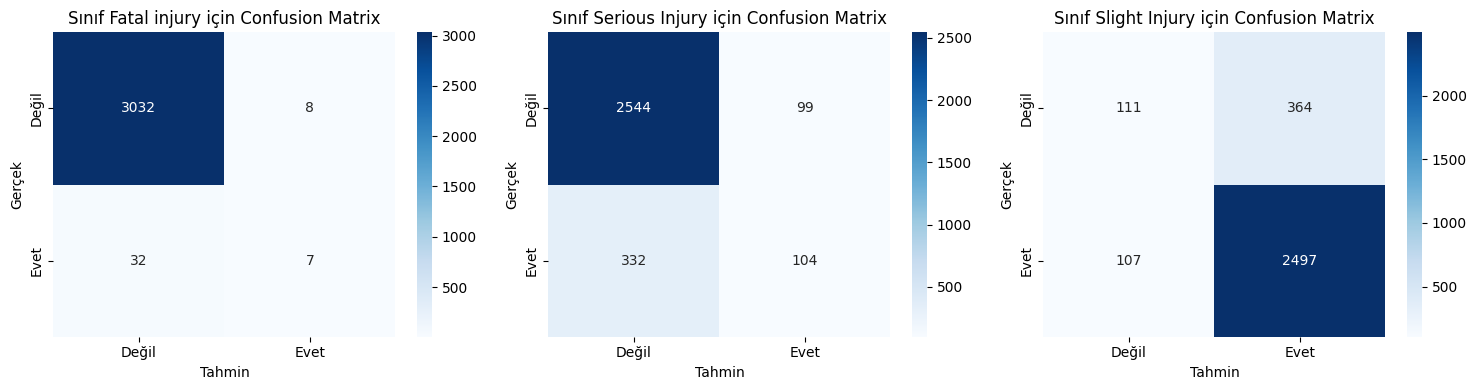

In [40]:
etiketler = np.unique(y_test8)

y_pred = best_modeller['Random Forest'].predict(X_test_8)

fig, axes = plt.subplots(1, len(etiketler), figsize=(5 * len(etiketler), 4))

for i, etiket in enumerate(etiketler):
    y_true_binary = (y_test8 == etiket).astype(int)
    y_pred_binary = (y_pred == etiket).astype(int)

    cm = confusion_matrix(y_true_binary, y_pred_binary)
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Sƒ±nƒ±f {etiket} i√ßin Confusion Matrix")
    axes[i].set_xlabel("Tahmin")
    axes[i].set_ylabel("Ger√ßek")
    axes[i].set_xticklabels(["Deƒüil", "Evet"])
    axes[i].set_yticklabels(["Deƒüil", "Evet"])

plt.tight_layout()
plt.show()